In [1]:
# pip install lets_plot

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from itertools import cycle

from pandas_datareader import data as pdr

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [3]:
from sklearn.linear_model import LinearRegression # Least Squares

from sklearn.svm import SVR # Support Vector Machine

from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors

# Regularization (Penalized Regressors) --> Linear

from sklearn.linear_model import ElasticNet # Elastic Net Penalty
from sklearn.linear_model import Lasso # LASSO

# Decision Tree with Ensemble --> Non-linear

from sklearn.tree import DecisionTreeRegressor # Decision Tree

## Bagging (Bootstrapped-AGGregation) --> intelligent architecture like Homo Sapiens

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting (more recent approaches) --> Homo Sapiens Sapiens

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from lets_plot import *
LetsPlot.setup_html()

### Download data (all constituents and S&P500)

- affinity propagation
- t-stochastic neighborhood embedding (t-sne)
- principal component analysis (PCA)

In [5]:
list_of_tickers = pd.read_html("https://stockanalysis.com/list/sp-500-stocks/")[0].iloc[ : , 1:]

list_of_tickers



,Symbol,Company Name,Market Cap,Stock Price,% Change,Revenue
0,NVDA,NVIDIA Corporation,4.72T,194.04,4.03%,187.14B
1,AAPL,Apple Inc.,4.05T,273.99,2.02%,416.16B
2,GOOGL,Alphabet Inc.,3.67T,304.23,3.90%,385.48B
3,MSFT,Microsoft Corporation,3.66T,492.75,1.16%,293.81B
4,GOOG,Alphabet Inc.,3.53T,304.76,4.02%,385.48B
...,...,...,...,...,...,...
498,LKQ,LKQ Corporation,7.55B,29.51,-0.32%,14.10B
499,MTCH,"Match Group, Inc.",7.55B,31.99,1.52%,3.47B
500,SOLS,"Solstice Advanced Materials, Inc.",7.26B,45.71,7.00%,3.81B
501,MOH,"Molina Healthcare, Inc.",7.06B,137.30,-0.59%,42.84B


In [6]:
tickers = list_of_tickers["Symbol"].tolist()
tickers

['NVDA',
 'AAPL',
 'GOOGL',
 'MSFT',
 'GOOG',
 'AMZN',
 'AVGO',
 'META',
 'TSLA',
 'BRK.B',
 'LLY',
 'WMT',
 'JPM',
 'ORCL',
 'V',
 'XOM',
 'JNJ',
 'MA',
 'NFLX',
 'PLTR',
 'ABBV',
 'COST',
 'BAC',
 'AMD',
 'PG',
 'HD',
 'GE',
 'CSCO',
 'CVX',
 'KO',
 'UNH',
 'IBM',
 'WFC',
 'CAT',
 'MS',
 'GS',
 'MU',
 'AXP',
 'PM',
 'RTX',
 'TMUS',
 'MRK',
 'CRM',
 'TMO',
 'MCD',
 'ABT',
 'ISRG',
 'PEP',
 'LIN',
 'LRCX',
 'AMAT',
 'APP',
 'DIS',
 'UBER',
 'INTU',
 'C',
 'AMGN',
 'QCOM',
 'T',
 'NEE',
 'BX',
 'INTC',
 'VZ',
 'NOW',
 'APH',
 'GEV',
 'BLK',
 'TJX',
 'ANET',
 'SCHW',
 'DHR',
 'KLAC',
 'GILD',
 'ACN',
 'BKNG',
 'SPGI',
 'BSX',
 'TXN',
 'BA',
 'PFE',
 'SYK',
 'WELL',
 'ETN',
 'ADBE',
 'CRWD',
 'COF',
 'UNP',
 'PANW',
 'PGR',
 'DE',
 'LOW',
 'MDT',
 'HON',
 'PLD',
 'CB',
 'CEG',
 'ADI',
 'COP',
 'HCA',
 'LMT',
 'VRTX',
 'HOOD',
 'KKR',
 'PH',
 'MCK',
 'ADP',
 'CMCSA',
 'CME',
 'CVS',
 'MO',
 'SO',
 'SBUX',
 'NEM',
 'DUK',
 'NKE',
 'GD',
 'BMY',
 'TT',
 'MMM',
 'MMC',
 'WM',
 'ICE',
 'CDNS',

In [7]:
benchmark = tickers + ["SPY"]

In [8]:
start_date = "2006-11-01"
end_date = "2025-11-13" #1 day later so we will have 2025-11-12 data

In [9]:
prices =\
(
    yf.download(benchmark,
               start = start_date,
               end = end_date,
               auto_adjust = True,
               interval = "1d"
            )
    # .dropna()
    # ["Close"]
)

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-11-01 -> 2025-11-13)')


In [10]:
prices

Price      Adj Close             Close                                      \
Ticker          BF.B BRK.B           A        AAPL        ABBV        ABNB   
Date                                                                         
2006-11-01       NaN   NaN   21.664772    2.374092         NaN         NaN   
2006-11-02       NaN   NaN   21.232618    2.368693         NaN         NaN   
2006-11-03       NaN   NaN   20.927570    2.347999         NaN         NaN   
2006-11-06       NaN   NaN   21.626640    2.390586         NaN         NaN   
2006-11-07       NaN   NaN   21.372429    2.414579         NaN         NaN   
...              ...   ...         ...         ...         ...         ...   
2025-11-06       NaN   NaN  147.490005  269.508728  219.039993  120.529999   
2025-11-07       NaN   NaN  146.740005  268.209991  219.160004  120.879997   
2025-11-10       NaN   NaN  146.360001  269.429993  218.710007  120.199997   
2025-11-11       NaN   NaN  149.419998  275.250000  225.169998  122.529999   
2025-11-12       NaN   NaN  151.520004  273.470001  233.229996  121.690002   

Price                                                      ...   Volume  \
Ticker             ABT       ACGL         ACN        ADBE  ...       WY   
Date                                                       ...            
2006-11-01   14.763540   6.749267   23.590086   37.759998  ...   851200   
2006-11-02   14.775990   6.878166   23.840439   37.660000  ...  1035700   
2006-11-03   14.832040   7.015518   23.668766   37.750000  ...  1121800   
2006-11-06   14.779107   7.073628   24.105087   38.540001  ...  1667600   
2006-11-07   14.900534   7.115891   23.675920   39.610001  ...  1504300   
...                ...        ...         ...         ...  ...      ...   
2025-11-06  124.949997  87.760002  241.339996  327.350006  ...  6740000   
2025-11-07  126.360001  89.570000  245.759995  326.950012  ...  6547900   
2025-11-10  125.889999  89.790001  244.550003  328.850006  ...  7552400   
2025-11-11  127.000000  90.660004  242.559998  333.220001  ...  3797500   
2025-11-12  128.820007  91.779999  246.529999  337.049988  ...  6965800   

Price                                                                   \
Ticker         WYNN      XEL       XOM        XYL         XYZ      YUM   
Date                                                                     
2006-11-01   794300  1147700  18329900        NaN         NaN  4395560   
2006-11-02  1091900  1577800  20154500        NaN         NaN  3625502   
2006-11-03   875300  1311800  25491100        NaN         NaN  4086758   
2006-11-06  1886200  1122800  17201800        NaN         NaN  2983973   
2006-11-07  1873100  1027300  20127000        NaN         NaN  2425069   
...             ...      ...       ...        ...         ...      ...   
2025-11-06  2895800  5096100  14219700   888200.0  11236400.0  2713100   
2025-11-07  3206100  4770100  17181100  1020800.0  21402400.0  2415500   
2025-11-10  2400000  5354100  13048000   947600.0   8017400.0  2142100   
2025-11-11  1566600  4506100  16077100   789500.0   5397400.0  1609800   
2025-11-12  1413900  3627100  13790900  1322700.0   5145900.0  2159000   

Price                                   
Ticker          ZBH    ZBRA        ZTS  
Date                                    
2006-11-01  1203864  810100        NaN  
2006-11-02  1312941  651100        NaN  
2006-11-03  1544897  447600        NaN  
2006-11-06  1822276  389600        NaN  
2006-11-07  1385144  340100        NaN  
...             ...     ...        ...  
2025-11-06  4482700  530000  7260900.0  
2025-11-07  2628200  777800  5808800.0  
2025-11-10  3073800  658100  4828400.0  
2025-11-11  2018100  482100  5574800.0  
2025-11-12  1615800  576500  5002800.0  

[4788 rows x 2522 columns]

In [11]:
prices =\
(
    prices.xs('Close', axis=1, level=0)
)
prices

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2006-11-01,21.664772,2.374092,NaN,NaN,14.763540,6.749267,23.590086,37.759998,20.067245,22.573462,...,12.167167,38.989265,11.086796,36.543430,NaN,NaN,14.850141,62.042061,36.830002,NaN
2006-11-02,21.232618,2.368693,NaN,NaN,14.775990,6.878166,23.840439,37.660000,20.016550,21.987684,...,12.207626,38.994633,11.001476,36.610294,NaN,NaN,14.820185,62.456852,35.930000,NaN
2006-11-03,20.927570,2.347999,NaN,NaN,14.832040,7.015518,23.668766,37.750000,19.782106,21.105967,...,12.130565,39.391556,11.011517,37.103985,NaN,NaN,14.483194,62.923454,35.730000,NaN
2006-11-06,21.626640,2.390586,NaN,NaN,14.779107,7.073628,24.105087,38.540001,20.168634,21.099810,...,12.213405,40.362404,11.021552,37.494827,NaN,NaN,14.742805,64.617104,35.799999,NaN
2006-11-07,21.372429,2.414579,NaN,NaN,14.900534,7.115891,23.675920,39.610001,20.548817,20.674347,...,12.145980,40.153198,10.991443,37.299397,NaN,NaN,14.825180,64.556595,35.990002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,147.490005,269.508728,219.039993,120.529999,124.949997,87.760002,241.339996,327.350006,232.880005,56.246017,...,22.830000,122.286255,80.540001,113.507202,150.339996,70.930000,147.610001,88.510002,258.239990,119.559998
2025-11-07,146.740005,268.209991,219.160004,120.879997,126.360001,89.570000,245.759995,326.950012,228.479996,56.503841,...,23.080000,125.878799,80.910004,116.203613,151.309998,65.449997,149.119995,88.500000,259.540009,120.239998
2025-11-10,146.360001,269.429993,218.710007,120.199997,125.889999,89.790001,244.550003,328.850006,232.000000,55.532032,...,22.680000,128.613129,80.400002,117.194946,151.050003,66.800003,148.259995,88.730003,260.630005,119.790001


In [12]:
prices.describe()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
count,4788.000000,4788.000000,3237.000000,1237.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,...,4788.000000,4788.000000,4788.000000,4788.000000,3542.000000,2510.000000,4788.000000,4788.000000,4788.000000,3216.000000
mean,62.816640,63.927924,85.498970,138.060942,54.614678,30.551167,135.812950,202.379827,81.198593,36.252383,...,20.388074,91.741259,34.326027,58.832823,68.192152,80.911677,65.250628,90.631085,153.318747,105.637393
std,45.093125,71.939890,52.404650,24.284181,37.989551,25.759325,108.051373,191.350001,65.442779,17.448523,...,7.537713,35.324029,20.171286,22.349494,37.088827,63.285265,41.134879,31.126143,143.341806,59.249108
min,7.905827,2.345299,20.059414,82.489998,13.804336,4.765058,19.584417,15.980000,10.674161,9.684754,...,4.108168,9.247416,8.902112,24.145130,19.160780,8.370000,11.518282,27.763401,16.450001,25.896311
25%,24.507662,11.207055,42.149178,121.080002,18.973855,10.627876,42.706218,38.585000,26.987660,21.697390,...,13.941375,68.754740,15.166108,45.055241,32.166472,47.672499,29.442877,61.121825,37.967501,44.484111
50%,39.525414,26.556056,68.083603,135.320007,37.083664,22.862771,97.453667,95.325001,50.987476,32.794353,...,20.837734,89.079109,30.215983,53.127199,65.575352,66.395000,52.379547,97.851627,83.509998,104.760952
75%,108.880436,122.949816,129.318665,152.229996,96.068256,38.035942,238.952789,361.724991,135.392239,44.723756,...,26.322950,110.681862,54.810369,59.694468,99.160952,82.384998,101.301083,113.234724,257.227493,161.461571
max,174.067612,275.250000,242.630859,216.839996,138.334625,109.220207,394.312805,688.369995,254.623001,88.675438,...,37.470203,207.099899,81.849998,119.946037,152.949997,281.809998,160.955307,167.155396,614.549988,237.474960


In [13]:
spy_price =\
(
    prices['SPY']
)
spy_price

Date
2006-11-01     95.973587
2006-11-02     95.917519
2006-11-03     95.749184
2006-11-06     96.829109
2006-11-07     97.200829
                 ...    
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
Name: SPY, Length: 4788, dtype: float64

In [14]:
forex_ticker = ["DEXJPUS", "DEXUSUK"]
forex_data =\
(
    pdr
    .get_data_fred(forex_ticker,
                   start = start_date,
                   end = end_date)
)
forex_data

,DEXJPUS,DEXUSUK
DATE,,
2006-11-01,117.01,1.9091
2006-11-02,117.12,1.9088
2006-11-03,118.06,1.9011
2006-11-06,118.40,1.8967
2006-11-07,117.44,1.9098
...,...,...
2025-11-07,153.06,1.3165
2025-11-10,153.99,1.3157
2025-11-11,NaN,NaN


In [15]:
index_ticker = ["VIXCLS"]
index_data =\
(
    pdr
    .get_data_fred(index_ticker,
                   start = start_date,
                   end = end_date)
)
index_data

,VIXCLS
DATE,
2006-11-01,11.51
2006-11-02,11.42
2006-11-03,11.16
2006-11-06,11.16
2006-11-07,11.09
...,...
2025-11-07,19.08
2025-11-10,17.60
2025-11-11,17.28


## Y variable - S&P weekly

In [16]:
#data wrangle
return_period = 5

In [17]:
spy_price

Date
2006-11-01     95.973587
2006-11-02     95.917519
2006-11-03     95.749184
2006-11-06     96.829109
2006-11-07     97.200829
                 ...    
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
Name: SPY, Length: 4788, dtype: float64

In [18]:
# #version 1
# spy_weekly =\
# (
#     np.log(spy_price)
#     .diff(return_period)
#     .shift(-return_period)
# )
# spy_weekly

In [18]:
#version 2
spy_weekly = (
    np.log(spy_price)
    .shift(-return_period)
    -
    np.log(spy_price)
)
spy_weekly

Date
2006-11-01    0.014868
2006-11-02    0.010183
2006-11-03    0.012374
2006-11-06    0.003615
2006-11-07    0.007260
                ...   
2025-11-06         NaN
2025-11-07         NaN
2025-11-10         NaN
2025-11-11         NaN
2025-11-12         NaN
Name: SPY, Length: 4788, dtype: float64

In [19]:
spy_weekly.name

'SPY'

In [20]:
spy_weekly.name =\
(
    spy_weekly
    .name
    + 
    "_pred"
)

In [21]:
spy_weekly

Date
2006-11-01    0.014868
2006-11-02    0.010183
2006-11-03    0.012374
2006-11-06    0.003615
2006-11-07    0.007260
                ...   
2025-11-06         NaN
2025-11-07         NaN
2025-11-10         NaN
2025-11-11         NaN
2025-11-12         NaN
Name: SPY_pred, Length: 4788, dtype: float64

## X variables setup

In [22]:
def compute_x_var(ticker_name):
    ###Currency exchange rates###
    x1_forex =\
    (
        np
        .log(forex_data)
        .diff(return_period)
    )
     
    ####Index data###
    x2_index =\
    (
        np
        .log(index_data)
        .diff(return_period)
    )
    
    ###lagged 5,15,30,60 returns of s&p index###
    x3_lagged =\
    pd.concat(
        [np
        .log(spy_price
            )
        .diff(i) for i in [return_period,
                           return_period * 3, # 15
                           return_period * 6, # 30
                           return_period * 12 # 60
                          ]
        ],
        axis = 1
    ).dropna()
        
    cols = [f"{ticker_name}_{t}" for t in ["DT", "3DT", "6DT", "12DT"]]
    x3_lagged.columns = cols
    
    ###21, 63, 252 MA of stock###
    x4_ma =\
    pd.concat(
        [(spy_price
        )
        .rolling(window = i) 
         .mean() for i in [21,
                           63,
                           252
                            ]
        ],
        axis =1
    ).dropna()
    
    macols = [f"{ticker_name}_MA_{t}" for t in ["21", "63", "252"]]
    x4_ma.columns = macols

    ### 10, 30, 200 EMA of stock ###
    x5_ema =\
    pd.concat(
        [(spy_price
        )
        .ewm(span = i, adjust= False) 
         .mean() for i in [10,
                           30,
                           200
                                      ]
        ],
        axis =1
    ).dropna()
        
    emacols = [f"{ticker_name}_EMA_{t}" for t in ["10", "30", "200"]]
    x5_ema.columns = emacols

    X =\
    (
        pd
        .concat([x1_forex, 
                 x2_index, 
                 x3_lagged, 
                 x4_ma, 
                 x5_ema
                ],
                axis = 1)
    )
    return X

In [23]:
X =\
(
    compute_x_var("SPY")
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.973587,95.973587,95.973587
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.963393,95.969970,95.973029
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.924446,95.955725,95.970802
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.088930,96.012073,95.979342
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.291093,96.088767,95.991496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07,-0.006447,0.001825,0.089874,-0.016393,0.009855,0.013731,0.042320,672.709999,659.847765,604.840321,675.862912,670.955571,619.671297
2025-11-10,-0.000909,0.000532,0.024735,-0.002784,0.014992,0.026408,0.060148,674.063331,660.491048,605.227223,676.876929,671.631986,620.285911
2025-11-11,NaN,NaN,-0.094889,0.011427,0.017294,0.024935,0.062652,675.013808,661.124270,605.602398,677.990214,672.365406,620.909932
2025-11-12,0.003433,0.006111,-0.028155,0.008523,0.023062,0.022089,0.068648,676.020952,661.762573,605.968967,678.970176,673.076025,621.531525


In [24]:
masterdata =\
(
    pd
    .concat([spy_weekly, X],
            axis = 1)
    .dropna()
)
masterdata

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,-0.025958,0.006813,0.016125,0.091998,-0.005349,-0.028974,-0.003510,0.012710,109.807363,106.911719,103.875340,109.197496,108.933154,105.208133
2007-11-02,-0.040904,0.006383,0.014806,0.162442,-0.015879,-0.033366,-0.005080,0.043916,109.711431,106.976130,103.923122,108.982418,108.873890,105.236058
2007-11-05,-0.043241,-0.001309,0.009177,0.201677,-0.026828,-0.032521,-0.010870,0.040970,109.514124,107.009896,103.967866,108.657079,108.765449,105.255530
2007-11-06,-0.026589,-0.001832,0.009054,0.015073,-0.006489,-0.011182,0.004482,0.050755,109.413769,107.043318,104.019005,108.653269,108.757105,105.289168
2007-11-07,-0.001624,-0.017326,0.012816,0.357376,-0.044560,-0.041971,-0.028526,0.038422,109.122233,107.079678,104.054065,108.109820,108.557570,105.292901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,-0.014103,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774
2025-10-31,-0.016393,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527
2025-11-03,-0.002784,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492
2025-11-04,0.011427,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049274


## data split train/test

In [25]:
Y = masterdata.iloc[:, 0]
X = masterdata.iloc[:, 1:]
Y
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,0.006813,0.016125,0.091998,-0.005349,-0.028974,-0.003510,0.012710,109.807363,106.911719,103.875340,109.197496,108.933154,105.208133
2007-11-02,0.006383,0.014806,0.162442,-0.015879,-0.033366,-0.005080,0.043916,109.711431,106.976130,103.923122,108.982418,108.873890,105.236058
2007-11-05,-0.001309,0.009177,0.201677,-0.026828,-0.032521,-0.010870,0.040970,109.514124,107.009896,103.967866,108.657079,108.765449,105.255530
2007-11-06,-0.001832,0.009054,0.015073,-0.006489,-0.011182,0.004482,0.050755,109.413769,107.043318,104.019005,108.653269,108.757105,105.289168
2007-11-07,-0.017326,0.012816,0.357376,-0.044560,-0.041971,-0.028526,0.038422,109.122233,107.079678,104.054065,108.109820,108.557570,105.292901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774
2025-10-31,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527
2025-11-03,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492
2025-11-04,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049274


In [26]:
Y =\
(
    masterdata
    .loc[ : , spy_weekly.name]
)

Y

2007-11-01   -0.025958
2007-11-02   -0.040904
2007-11-05   -0.043241
2007-11-06   -0.026589
2007-11-07   -0.001624
                ...   
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
Name: SPY_pred, Length: 4292, dtype: float64

In [27]:
Y

2007-11-01   -0.025958
2007-11-02   -0.040904
2007-11-05   -0.043241
2007-11-06   -0.026589
2007-11-07   -0.001624
                ...   
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
Name: SPY_pred, Length: 4292, dtype: float64

In [28]:
X =\
(
    masterdata
    .loc[ : , X.columns]
)

In [29]:
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,0.006813,0.016125,0.091998,-0.005349,-0.028974,-0.003510,0.012710,109.807363,106.911719,103.875340,109.197496,108.933154,105.208133
2007-11-02,0.006383,0.014806,0.162442,-0.015879,-0.033366,-0.005080,0.043916,109.711431,106.976130,103.923122,108.982418,108.873890,105.236058
2007-11-05,-0.001309,0.009177,0.201677,-0.026828,-0.032521,-0.010870,0.040970,109.514124,107.009896,103.967866,108.657079,108.765449,105.255530
2007-11-06,-0.001832,0.009054,0.015073,-0.006489,-0.011182,0.004482,0.050755,109.413769,107.043318,104.019005,108.653269,108.757105,105.289168
2007-11-07,-0.017326,0.012816,0.357376,-0.044560,-0.041971,-0.028526,0.038422,109.122233,107.079678,104.054065,108.109820,108.557570,105.292901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774
2025-10-31,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527
2025-11-03,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492
2025-11-04,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049274


In [30]:
#set up variables for buyandhold
spy_weekly_price = spy_price.resample('W-FRI').last() 
bh_returns = np.log(spy_weekly_price).diff()   # no shift!

In [31]:
testing_set = 0.25

train_size = int(len(X) * (1 - testing_set)
                )
train_size_bh = int(len(bh_returns) * (1 - testing_set))

In [32]:
train_size

3219

In [33]:
len(Y) == len(X) # cross-validate the data

True

In [34]:
Y_train, Y_test =\
(
    Y[0         : train_size],
    Y[train_size:len(Y)     ]
)

In [35]:
Y_test

2021-05-07   -0.013211
2021-05-10   -0.005807
2021-05-11   -0.005496
2021-05-12    0.013354
2021-05-13    0.012113
                ...   
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
Name: SPY_pred, Length: 1073, dtype: float64

In [36]:
X_train, X_test =\
(
    X[0         : train_size],
    X[train_size:len(X)     ]
)

In [37]:
bh_train = bh_returns.iloc[:train_size_bh].dropna()
bh_test  = bh_returns.iloc[train_size_bh:].dropna()

In [38]:
#set metrics
seed = 2025
num_folds = 10

metric = "neg_mean_squared_error" 

## Modelling Phase 1) Vanilla Model
- In this case, we use supervised learning to predict the price of SPY and assess performance
- Firstly, we set up the models

In [39]:
models = []

In [40]:
(
    models
    .append(
        ("LR", LinearRegression()
         )
           )
)
(
    models
    .append(
        ("Elastic Net Penalty", ElasticNet()
         )
           )
)
(
    models
    .append(
        ("LASSO", Lasso()
         )
           )
)
(
    models
    .append(
        ("Support Vector Machine", SVR()
         )
           )
)
(
    models
    .append(
        ("K-Nearest Neighbors", KNeighborsRegressor()
         )
           )
)
(
    models
    .append(
        ("Decision Tree", DecisionTreeRegressor()
         )
           )
)
(
    models
    .append(
        ("Extra Trees Algo", ExtraTreesRegressor()
         )
           )
)
(
    models
    .append(
        ("Random Forest", RandomForestRegressor()
         )
           )
)
(
    models
    .append(
        ("Gradient Boosting", GradientBoostingRegressor()
         )
           )
)

(
    models
    .append(
        ("Adaptive Boosting", AdaBoostRegressor()
         )
           )
)

In [42]:
models

[('LR', LinearRegression()),
 ('Elastic Net Penalty', ElasticNet()),
 ('LASSO', Lasso()),
 ('Support Vector Machine', SVR()),
 ('K-Nearest Neighbors', KNeighborsRegressor()),
 ('Decision Tree', DecisionTreeRegressor()),
 ('Extra Trees Algo', ExtraTreesRegressor()),
 ('Random Forest', RandomForestRegressor()),
 ('Gradient Boosting', GradientBoostingRegressor()),
 ('Adaptive Boosting', AdaBoostRegressor())]

In [43]:
# Let's build empty lists to store performance across many algorithms

names = []

train_results = []
test_results = []

kfold_results = []

In [44]:
for name, model in models:

    names.append(name)

    # set k-fold cross-validation (here, 10)

    kfold =\
    (
        KFold(n_splits = num_folds,
              random_state = seed,
              shuffle = True)
    )

    # run cross-validation

    cv_results =\
    (
        -1
        *
        cross_val_score(model, X_train, Y_train,
                        cv = kfold,
                        scoring = metric)
    )

    # Cross-validation results should be contained in objects

    kfold_results.append(cv_results)

    # Training Set Model Fitting

    res = model.fit(X_train, Y_train)

    # Assess the performance in Training Set

    train_result = mean_squared_error(res.predict(X_train), Y_train)

    train_results.append(train_result)

    # Assess the performance in Testing Set

    test_result = mean_squared_error(res.predict(X_test), Y_test)

    test_results.append(test_result)    

    user_interface_message = "%s: %f (%f) %f %f " % (name, 
                                                     cv_results.mean(), 
                                                     cv_results.std(), 
                                                     train_result, 
                                                     test_result)

    print(user_interface_message)

LR: 0.000696 (0.000143) 0.000682 0.000563 
Elastic Net Penalty: 0.000696 (0.000137) 0.000696 0.000531 
LASSO: 0.000696 (0.000137) 0.000696 0.000531 
Support Vector Machine: 0.001958 (0.000199) 0.001864 0.004850 
K-Nearest Neighbors: 0.000319 (0.000060) 0.000164 0.000635 
Decision Tree: 0.000732 (0.000146) 0.000000 0.002636 
Extra Trees Algo: 0.000301 (0.000067) 0.000000 0.000765 
Random Forest: 0.000414 (0.000080) 0.000055 0.000705 
Gradient Boosting: 0.000547 (0.000109) 0.000359 0.000626 
Adaptive Boosting: 0.000965 (0.000130) 0.001065 0.000865 


In [45]:
df_for_comparison =\
(
    pd
    .DataFrame(
        {"Algorithms": names * 2,
         "Data": ["Training Set"] * len(names) + ["Testing Set"] * len(names),
         "Performance": train_results + test_results
         }
    )
)
df_for_comparison

,Algorithms,Data,Performance
0,LR,Training Set,6.816231e-04
1,Elastic Net Penalty,Training Set,6.958562e-04
2,LASSO,Training Set,6.958562e-04
3,Support Vector Machine,Training Set,1.864085e-03
4,K-Nearest Neighbors,Training Set,1.635090e-04
5,Decision Tree,Training Set,0.000000e+00
6,Extra Trees Algo,Training Set,8.154240e-34
7,Random Forest,Training Set,5.479873e-05
8,Gradient Boosting,Training Set,3.587783e-04
9,Adaptive Boosting,Training Set,1.064905e-03


In [46]:
performance_comparison =\
(
    ggplot(df_for_comparison,
           aes(x = "Algorithms",
               y = "Performance",
               fill = "Data"
              )
          )
    + geom_bar(stat = "identity",
               position = "dodge",
               width = 0.5)
    + labs(title = "Comparing the Performance of Machine Learning Algorithms on the Training vs. Testing Set",
           y = "Mean Squared Error (MSE)",
           x = "Name of ML Algorithms",
           caption = "Source: Federal Reserve Bank & Yahoo Finance")
    + theme(legend_position = "top")
    + ggsize(1000, 500)
)

performance_comparison.show()
##red > blue underfitting
## blue > red overfitting
## blue line is what we care about

> Based on the results, we shortlist 3 models:
- Linear Regression
- Adaptive Boosting
- kNN

## kNN

In [41]:
knearest = None

for name, model in models:
    if name == "K-Nearest Neighbors":
        knearest = model
        break
knearest.fit(X_train, Y_train)

y_pred_train_knn = knearest.predict(X_train)
y_pred_test_knn = knearest.predict(X_test)



## Linear Regression

In [42]:
linear_regression = None

for name, model in models:
    if name == "LR":
        linear_regression = model
        break
linear_regression.fit(X_train, Y_train)

y_pred_train_lr = linear_regression.predict(X_train)
y_pred_test_lr = linear_regression.predict(X_test)


## Adaptive Boosting

In [43]:
adaptive_boosting = None

for name, model in models:
    if name == "Adaptive Boosting":
        adaptive_boosting = model
        break
adaptive_boosting.fit(X_train, Y_train)

y_pred_train_ab = adaptive_boosting.predict(X_train)
y_pred_test_ab = adaptive_boosting.predict(X_test)


In [44]:
def simple_momentum_strategy(predictions, actual_returns, lookback=10):
    """
    Simple momentum: Go long if recent predictions are improving
    """
    # pred_series = pd.Series(predictions, index=actual_returns.index)
    vol_window = 5
    vol_threshold = 0.02
    df = pd.DataFrame(index=actual_returns.index)
    df["pred"] = pd.Series(predictions, index=actual_returns.index)
    df["actual_returns"] = actual_returns

    # Compute SMAs
    df['sma3'] = df['pred'].rolling(3).mean()
    df['sma7'] = df['pred'].rolling(7).mean()

    
    # Momentum signal: current prediction vs rolling average
    # pred_momentum = pred_series > pred_series.rolling(lookback).mean()

    # Generate signals using crossovers
    threshold = 0.001
    # df['signal'] = np.where(df['sma3'] > df['sma7'], 1, -1)
    df['signal'] = np.where(df['sma3'] - df['sma7'] > threshold, 1,
                            np.where(df['sma7'] - df['sma3'] > threshold, -1 , 0)) 
     # Compute rolling volatility of actual returns
    # df['vol'] = actual_returns.rolling(vol_window).std()

    # # Apply volatility filter: zero out positions if vol too high
    # df.loc[df['vol'] > vol_threshold, 'signal'] = 0

    df['strategy_returns'] = df['signal'].shift(1) * actual_returns
    # df['strategy_returns'] = df['signal'].shift(2) * df['actual_returns']
    # Go long if momentum positive, short if negative
    # positions = np.where(pred_momentum, 1, -1)
    
    # strategy_returns = pd.Series(positions * actual_returns.values, 
    #                             index=actual_returns.index)
    
    return df['strategy_returns'].dropna()



In [45]:
#version 1
def calculate_metrics(ts_returns, periods_per_year = 252, starting_capital = 100_000, is_log_return = False):
    if is_log_return:
        equity = np.exp(ts_returns.cumsum())
    else:
        equity = (ts_returns + 1).cumprod()
    # equity = ts_returns.add(1).cumprod()
    equity_dollars = equity * starting_capital
    years =\
    (
        equity.index[-1]
        -
        equity.index[0]
    ).days / 365.25

    n_years = ts_returns.shape[0] / periods_per_year
    # Annualized return
    if is_log_return:
        # For log returns, cumulative growth = exp(sum(log_returns))
        total_return_factor = equity.iloc[-1]
        annualized_return = total_return_factor ** (1 / n_years) - 1
    else:
        total_return_factor = equity.iloc[-1]
        annualized_return = total_return_factor ** (1 / n_years) - 1
    # annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
    #                             ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    if isinstance(annualized_vol, (int, float, np.floating)):
    # scalar case
        annualized_vol_safe = np.nan if annualized_vol == 0 else annualized_vol
    else:
        # pandas Series case
        annualized_vol_safe = annualized_vol.replace(0, np.nan)

    annualized_sharpe = annualized_return / annualized_vol_safe

    cagr = equity.iloc[-1] ** (1 / years) - 1

    max_dd =\
    (
        (equity - equity.cummax()
        )
        /
        equity.cummax()
    ).min()
    
    # Extract final account value as a scalar, not a Series
    final_account_value = equity_dollars.iloc[-1].values if hasattr(equity_dollars.iloc[-1], 'values') else equity_dollars.iloc[-1]

    return pd.DataFrame({
        "CAGR": [cagr * 100],
        "Sharpe": [annualized_sharpe],  # Keep as raw number, not percentage
        "Max_Drawdown": [max_dd],
        "Final_Account_Value": [final_account_value]  # Keep as dollar amount
    }
    ).round(2)

In [46]:
#version 2
def calculate_metrics(ts_returns, periods_per_year=252, starting_capital=100_000, is_log_return=False):
    ts_returns = ts_returns.dropna()

    # -----------------------------
    # 1. Convert to simple returns
    # -----------------------------
    if is_log_return:
        simple_returns = np.exp(ts_returns) - 1
    else:
        simple_returns = ts_returns

    # ---------------------------------------
    # 2. Compute equity curve (simple returns)
    # ---------------------------------------
    equity = (1 + simple_returns).cumprod()
    equity_dollars = equity * starting_capital

    # --------------------------------------
    # 3. Compute number of years (correctly)
    # --------------------------------------
    years = (equity.index[-1] - equity.index[0]).days / 365.25

    # 4. CAGR (correct formula)
    cagr = (equity.iloc[-1] / equity.iloc[0]) ** (1 / years) - 1

    # ---------------------------------------------
    # 5. Annualized volatility & Sharpe (correct)
    # ---------------------------------------------
    vol = simple_returns.std() * np.sqrt(periods_per_year)
    sharpe = simple_returns.mean() * periods_per_year / vol if vol != 0 else np.nan

    # -----------------------------
    # 6. Max drawdown
    # -----------------------------
    running_max = equity.cummax()
    max_dd = ((equity - running_max) / running_max).min()

    return pd.DataFrame({
        "CAGR": [round(cagr * 100, 2)],
        "Sharpe": [round(sharpe, 2)],
        "Max_Drawdown": [round(max_dd, 2)],
        "Final_Account_Value": [round(equity_dollars.iloc[-1], 2)]
    })


In [47]:
print("Number of weekly periods:", bh_test.shape[0])

Number of weekly periods: 249


In [48]:
def compute_and_compare(train_momentum, test_momentum, bh_train, bh_test):

    # Calculate metrics for your momentum strategy
    strategy_metrics_train = calculate_metrics(train_momentum.dropna(), periods_per_year=52, is_log_return= False)
    strategy_metrics_test = calculate_metrics(test_momentum.dropna(), periods_per_year=52, is_log_return = False)

    print("Momentum Strategy Performance:")
    print("Training Set:")
    print(strategy_metrics_train)
    print("\nTesting Set:")
    print(strategy_metrics_test)

    # Calculate buy-and-hold metrics
    bh_train_result = calculate_metrics(bh_train, periods_per_year=52, is_log_return = True)
    bh_test_result = calculate_metrics(bh_test, periods_per_year=52, is_log_return= True)

    print("\nBuy-and-Hold Performance:")
    print("Training Set:")
    print(bh_train_result)
    print("\nTesting Set:")
    print(bh_test_result)

    # Detailed comparison
    print("\n" + "="*50)
    print("PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold")
    print("="*50)

    print(f"\nSHARPE RATIO:")
    print(f"Train - Momentum: {strategy_metrics_train['Sharpe'].iloc[0]:.3f} vs BH: {bh_train_result['Sharpe'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['Sharpe'].iloc[0]:.3f} vs BH: {bh_test_result['Sharpe'].iloc[0]:.3f}")

    print(f"\nCAGR (Annualized Return):")
    print(f"Train - Momentum: {strategy_metrics_train['CAGR'].iloc[0]:.3f} vs BH: {bh_train_result['CAGR'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['CAGR'].iloc[0]:.3f} vs BH: {bh_test_result['CAGR'].iloc[0]:.3f}")

    print(f"\nMAX DRAWDOWN:")
    print(f"Train - Momentum: {strategy_metrics_train['Max_Drawdown'].iloc[0]:.3f} vs BH: {bh_train_result['Max_Drawdown'].iloc[0]:.3f}")
    print(f"Test  - Momentum: {strategy_metrics_test['Max_Drawdown'].iloc[0]:.3f} vs BH: {bh_test_result['Max_Drawdown'].iloc[0]:.3f}")

    print(f"\nFINAL ACCOUNT VALUE ($):")
    print(f"Train - Momentum: ${strategy_metrics_train['Final_Account_Value'].iloc[0]:,.2f} vs BH: ${bh_train_result['Final_Account_Value'].iloc[0]:,.2f}")
    print(f"Test  - Momentum: ${strategy_metrics_test['Final_Account_Value'].iloc[0]:,.2f} vs BH: ${bh_test_result['Final_Account_Value'].iloc[0]:,.2f}")

    # Calculate outperformance
    sharpe_outperformance = strategy_metrics_test['Sharpe'].iloc[0] - bh_test_result['Sharpe'].iloc[0]
    cagr_outperformance = strategy_metrics_test['CAGR'].iloc[0] - bh_test_result['CAGR'].iloc[0]

    print(f"\nOUTPERFORMANCE (Test Set):")
    print(f"Sharpe Ratio: {sharpe_outperformance:+.3f}")
    print(f"CAGR: {cagr_outperformance:+.3f}")

## kNN Model Results

In [49]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_knn, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_knn, Y_test)
# strategy_metrics_train = calculate_metrics(train_momentum['strategy_returns'].dropna(), periods_per_year=52)
# strategy_metrics_test = calculate_metrics(test_momentum['strategy_returns'].dropna(), periods_per_year=52)

lasso_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)

Momentum Strategy Performance:
Training Set:
     CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  943.98    3.09         -0.27         5.768666e+18

Testing Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  4.19    0.31         -0.12            120249.95

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.72    0.59         -0.55            379102.47

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  13.93     0.9         -0.24            188265.43

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 3.090 vs BH: 0.590
Test  - Momentum: 0.310 vs BH: 0.900

CAGR (Annualized Return):
Train - Momentum: 943.980 vs BH: 9.720
Test  - Momentum: 4.190 vs BH: 13.930

MAX DRAWDOWN:
Train - Momentum: -0.270 vs BH: -0.550
Test  - Momentum: -0.120 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $5,768,666,358,708,263,936.00 vs BH: $379,102.47
Test  - Momentum: $120,249.95 vs BH: $188,2

## Linear Regression

In [50]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  3.87    0.13         -0.62            167028.85

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  45.55    0.65         -0.44            539386.03

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.72    0.59         -0.55            379102.47

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  13.93     0.9         -0.24            188265.43

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.130 vs BH: 0.590
Test  - Momentum: 0.650 vs BH: 0.900

CAGR (Annualized Return):
Train - Momentum: 3.870 vs BH: 9.720
Test  - Momentum: 45.550 vs BH: 13.930

MAX DRAWDOWN:
Train - Momentum: -0.620 vs BH: -0.550
Test  - Momentum: -0.440 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $167,028.85 vs BH: $379,102.47
Test  - Momentum: $539,386.03 vs BH: $188,265.43

OUTPERFORMANCE

## Adaptive Boosting

In [52]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_ab, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_ab, Y_test)
adaptive_boosting_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)



Momentum Strategy Performance:
Training Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  41.83    0.54         -0.66          11219404.54

Testing Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  1.26    0.09         -0.42            105769.65

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.72    0.59         -0.55            379102.47

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  13.93     0.9         -0.24            188265.43

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.540 vs BH: 0.590
Test  - Momentum: 0.090 vs BH: 0.900

CAGR (Annualized Return):
Train - Momentum: 41.830 vs BH: 9.720
Test  - Momentum: 1.260 vs BH: 13.930

MAX DRAWDOWN:
Train - Momentum: -0.660 vs BH: -0.550
Test  - Momentum: -0.420 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $11,219,404.54 vs BH: $379,102.47
Test  - Momentum: $105,769.65 vs BH: $188,265.43

OUTPERFORMA

## Phase 2: Enhancing the models by integrating Affinity Propagation and PCA
- we strive to build features and pluck them back into the winner linear regression

In [53]:
missing_fractions = \
    prices \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

In [54]:
missing_fractions.head(10)
#no missing as we choose a more recent timeframe

Ticker
BF.B     1.000000
BRK.B    1.000000
Q        0.997285
SOLS     0.996241
GEV      0.914369
SOLV     0.914160
VLTO     0.889307
KVUE     0.867377
GEHC     0.847536
CEG      0.799708
dtype: float64

## Set up PCA

In [55]:
drop_list =\
(
    sorted(list(missing_fractions[missing_fractions > 0.30]
                .index)
          )
)

df_pca =\
(
    prices
    .drop(labels = drop_list,
          axis = 1)
)
df_pca.shape[1]


445

In [56]:
df_pca['SPY']

Date
2006-11-01     95.973587
2006-11-02     95.917519
2006-11-03     95.749184
2006-11-06     96.829109
2006-11-07     97.200829
                 ...    
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
Name: SPY, Length: 4788, dtype: float64

In [57]:
df_pca =\
(
    df_pca
    .fillna(method = "ffill")
)

df_pca =\
(
    df_pca
    .dropna(axis = 0)
)

df_pca.shape

C:\Users\coool\AppData\Local\Temp\ipykernel_23760\4107408549.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pca


(3363, 445)

In [58]:
tickers_no_spy = [c for c in df_pca.columns if c != "SPY"]
print(len(tickers_no_spy))

444


In [59]:
df_pca['SPY']

Date
2012-06-29    107.636650
2012-07-02    107.960854
2012-07-03    108.672661
2012-07-05    108.182289
2012-07-06    107.154152
                 ...    
2025-11-06    670.309998
2025-11-07    670.969971
2025-11-10    681.440002
2025-11-11    683.000000
2025-11-12    683.380005
Name: SPY, Length: 3363, dtype: float64

In [60]:
breakpoint = int(len(df_pca) * 0.75)

train_raw = df_pca[:breakpoint]
test_raw  = df_pca[breakpoint:]
train_ret = train_raw.pct_change().dropna()
test_ret  = test_raw.pct_change().dropna()
scaler = StandardScaler().fit(train_ret)
scaled_train = pd.DataFrame(scaler.transform(train_ret),
                            columns=train_ret.columns,
                            index=train_ret.index)
scaled_test = pd.DataFrame(scaler.transform(test_ret),
                           columns=test_ret.columns,
                           index=test_ret.index)


In [61]:
Daily_Linear_Return =\
(
    df_pca
    .pct_change(1)
)

Daily_Linear_Return.shape[0]

3363

In [62]:
# Operational defition of outliers = data points beyond 3 SD

# Daily_Linear_Return =\
# (
#     Daily_Linear_Return[Daily_Linear_Return 
#                         .apply(lambda x:(x - x.mean()
#                                         ).abs() < (3 * x.std()
#                                                   )
#                               )
#                         .all(1)
#     ]
# )
Daily_Linear_Return_clipped = Daily_Linear_Return.clip(
    lower = Daily_Linear_Return.mean() - 3 * Daily_Linear_Return.std(),
    upper = Daily_Linear_Return.mean() + 3 * Daily_Linear_Return.std(),
    axis = 1 
)
Daily_Linear_Return.shape[0]

3363

In [63]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [64]:
scaled_dfprices =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_dfprices.describe()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
count,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,...,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03,3.362000e+03
mean,-5.283631e-19,-1.479417e-17,-1.796435e-17,5.283631e-18,-1.215235e-17,1.268072e-17,1.690762e-17,-5.283631e-19,3.170179e-18,-2.113453e-18,...,7.925447e-18,8.189628e-18,3.698542e-18,-2.324798e-17,2.800325e-17,-1.690762e-17,3.698542e-18,1.954944e-17,-3.170179e-18,9.510536e-18
std,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-6.660467e+00,-7.229511e+00,-6.962582e+00,-1.093363e+01,-6.809480e+00,-8.456377e+00,-8.765018e+00,-1.490234e+01,-1.097036e+01,-7.311959e+00,...,-1.952486e+01,-6.612448e+00,-1.216981e+01,-8.513622e+00,-1.003573e+01,-7.605882e+00,-7.345089e+00,-1.264071e+01,-9.219979e+00,-1.007684e+01
25%,-5.088145e-01,-4.671538e-01,-4.780969e-01,-4.180899e-01,-4.643295e-01,-4.291625e-01,-4.804343e-01,-4.737277e-01,-4.251106e-01,-4.639227e-01,...,-4.415677e-01,-4.440888e-01,-4.839647e-01,-4.702476e-01,-4.981610e-01,-4.802163e-01,-4.856259e-01,-4.507388e-01,-4.551082e-01,-4.599477e-01
50%,8.700639e-03,-4.231999e-03,-7.323282e-04,1.812576e-02,3.224720e-02,1.132277e-02,6.323996e-03,2.639475e-02,2.288720e-02,6.540985e-03,...,-1.128627e-02,1.521411e-02,1.729474e-02,-2.304920e-02,1.317235e-02,-9.851926e-03,1.028402e-03,1.460597e-02,1.100123e-04,2.061589e-03
75%,5.463799e-01,5.115380e-01,5.264675e-01,4.555432e-01,4.930012e-01,4.862423e-01,4.853641e-01,5.221977e-01,4.970112e-01,4.976142e-01,...,4.426700e-01,4.591906e-01,4.797433e-01,4.336603e-01,5.474832e-01,4.842316e-01,5.071720e-01,4.590775e-01,4.835446e-01,4.542925e-01
max,5.874658e+00,8.494666e+00,7.690777e+00,9.862679e+00,8.413114e+00,8.830359e+00,9.609367e+00,6.285808e+00,8.403646e+00,7.386566e+00,...,1.156403e+01,1.072930e+01,1.355140e+01,9.605866e+00,8.824290e+00,7.844819e+00,7.510760e+00,1.552477e+01,9.448390e+00,7.210485e+00


### Affinity Propagation setup

In [65]:
df_stocks = df_pca[tickers_no_spy]
df_stocks

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,25.060337,17.514771,23.784880,12.580387,47.257988,32.369999,28.071077,20.209345,36.335030,34.990002,...,23.420179,76.361282,13.679349,76.352493,18.379690,49.897144,21.134531,35.924126,55.932178,34.360001
2012-07-02,24.849577,17.770300,23.843901,12.672308,47.572578,32.189999,27.750650,19.880733,36.400318,34.509998,...,23.642822,76.947266,13.667115,75.196762,18.586712,49.763039,21.025372,35.662025,56.045166,33.709999
2012-07-03,25.251919,17.976925,23.917698,12.808603,48.044437,32.509998,27.780460,19.846502,36.556995,34.700001,...,23.647463,77.010025,13.868998,74.755104,18.580238,50.311146,21.562759,35.238205,56.218967,34.139999
2012-07-05,25.143356,18.292734,23.888174,12.675477,47.399567,32.529999,27.892239,19.511051,36.863808,34.650002,...,23.401619,78.077286,13.660997,74.953850,18.528482,49.897144,21.436811,36.108170,55.436825,34.330002
2012-07-06,24.249262,18.170975,23.888174,12.539183,45.960339,31.370001,27.288633,19.435745,36.184895,32.310001,...,23.281010,77.763397,13.636530,74.122009,18.496138,49.448132,21.159716,36.202961,54.506924,33.880001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,147.490005,269.508728,124.949997,87.760002,241.339996,327.350006,232.880005,56.246017,252.360001,294.859985,...,275.121643,322.200012,22.830000,122.286255,80.540001,113.507202,150.339996,147.610001,88.510002,258.239990
2025-11-07,146.740005,268.209991,126.360001,89.570000,245.759995,326.950012,228.479996,56.503841,254.160004,297.179993,...,270.825073,326.049988,23.080000,125.878799,80.910004,116.203613,151.309998,149.119995,88.500000,259.540009
2025-11-10,146.360001,269.429993,125.889999,89.790001,244.550003,328.850006,232.000000,55.532032,254.059998,298.720001,...,275.251556,321.609985,22.680000,128.613129,80.400002,117.194946,151.050003,148.259995,88.730003,260.630005


In [66]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    df_stocks
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [67]:
returns["Volatility"] =\
(    
    df_stocks
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns.copy()

In [68]:
returns

,Returns,Volatility
Ticker,,
A,0.169846,0.264098
AAPL,0.246590,0.284673
ABT,0.151911,0.224518
ACGL,0.179434,0.246081
ACN,0.153009,0.241492
...,...,...
XOM,0.096724,0.255988
XYL,0.181060,0.261529
YUM,0.134937,0.237209


In [69]:
# You may format the data as a numpy array to feed into the K-Means algorithm

data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [70]:
data.ndim

2

In [71]:
scaler = StandardScaler().fit(data)

In [72]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(data),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
Ticker,,
A,-0.077965,-0.432959
AAPL,0.912805,-0.161153
ABT,-0.309504,-0.955828
ACGL,0.045818,-0.670977
ACN,-0.295325,-0.731604


In [73]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
Ticker,,
A,-0.077965,-0.432959
AAPL,0.912805,-0.161153
ABT,-0.309504,-0.955828
ACGL,0.045818,-0.670977
ACN,-0.295325,-0.731604


## 1) Clustering Algo: kmeans

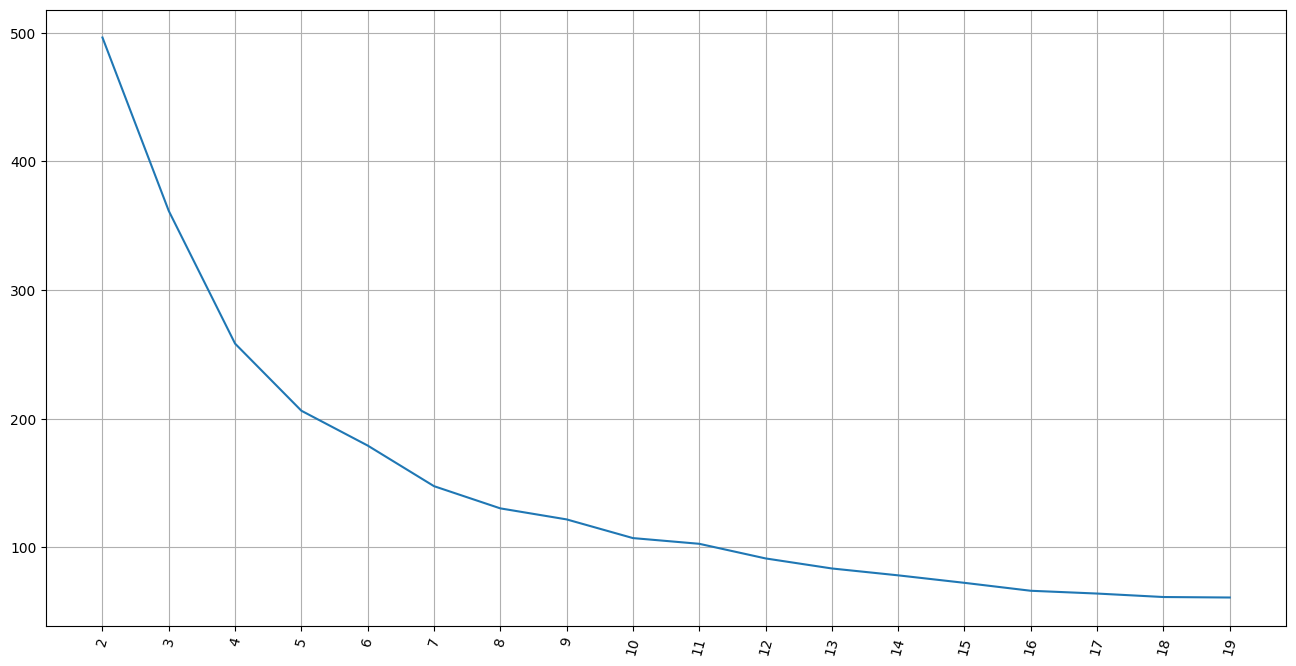

In [74]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), 
         distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

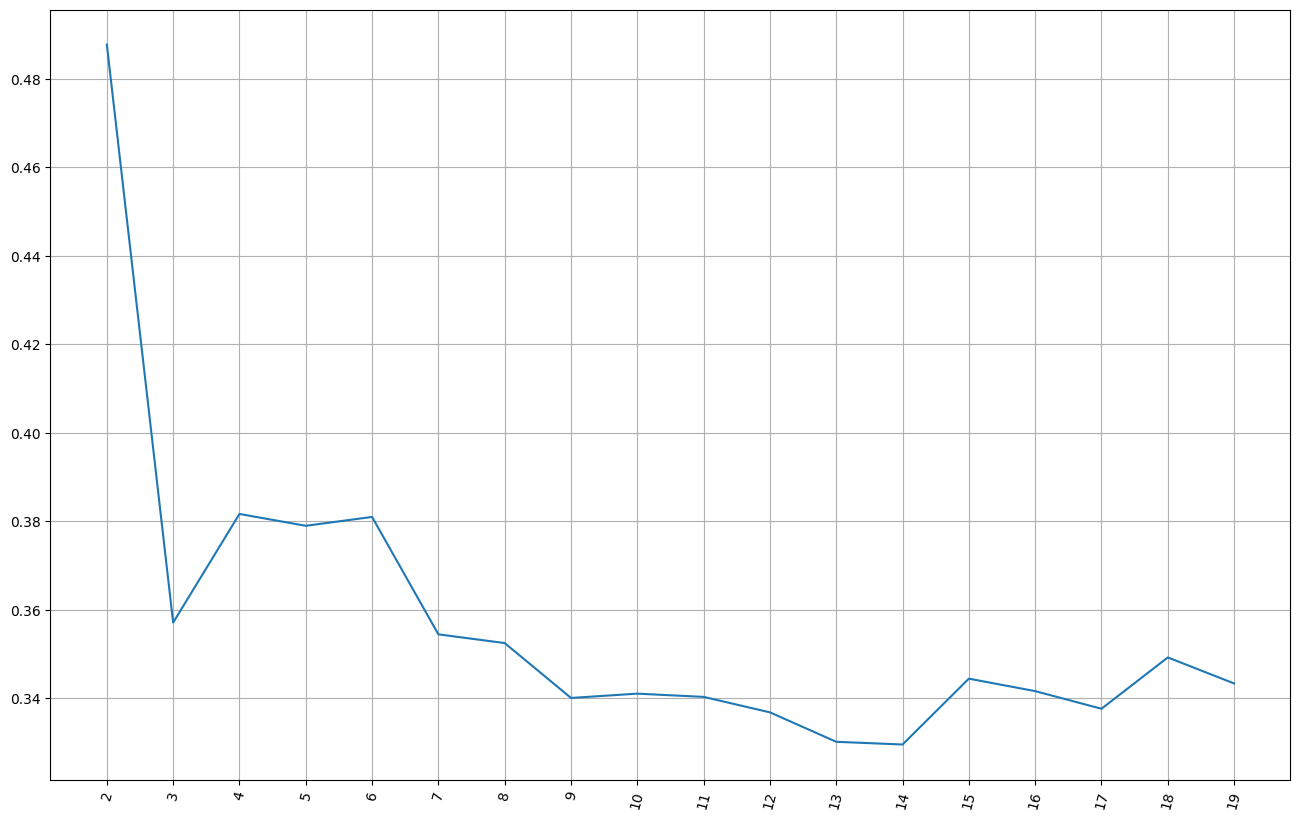

In [75]:
from sklearn import metrics
silhouette_score = []

for k in range(2, max_loop): #starts from k=2, there's no silouhette metric given for k =1 
        kmeans = KMeans(n_clusters = k,  
                        random_state = 627, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state = 627)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

In [76]:
nclust = 3

In [77]:
# Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [78]:
# Extracting labels 

target_labels = k_means.predict(X)

C:\Users\coool\AppData\Local\Temp\ipykernel_23760\3401718675.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "sg" (-> color='g'). The keyword argument will take precedence.
  plt.plot(centroids[:,0],


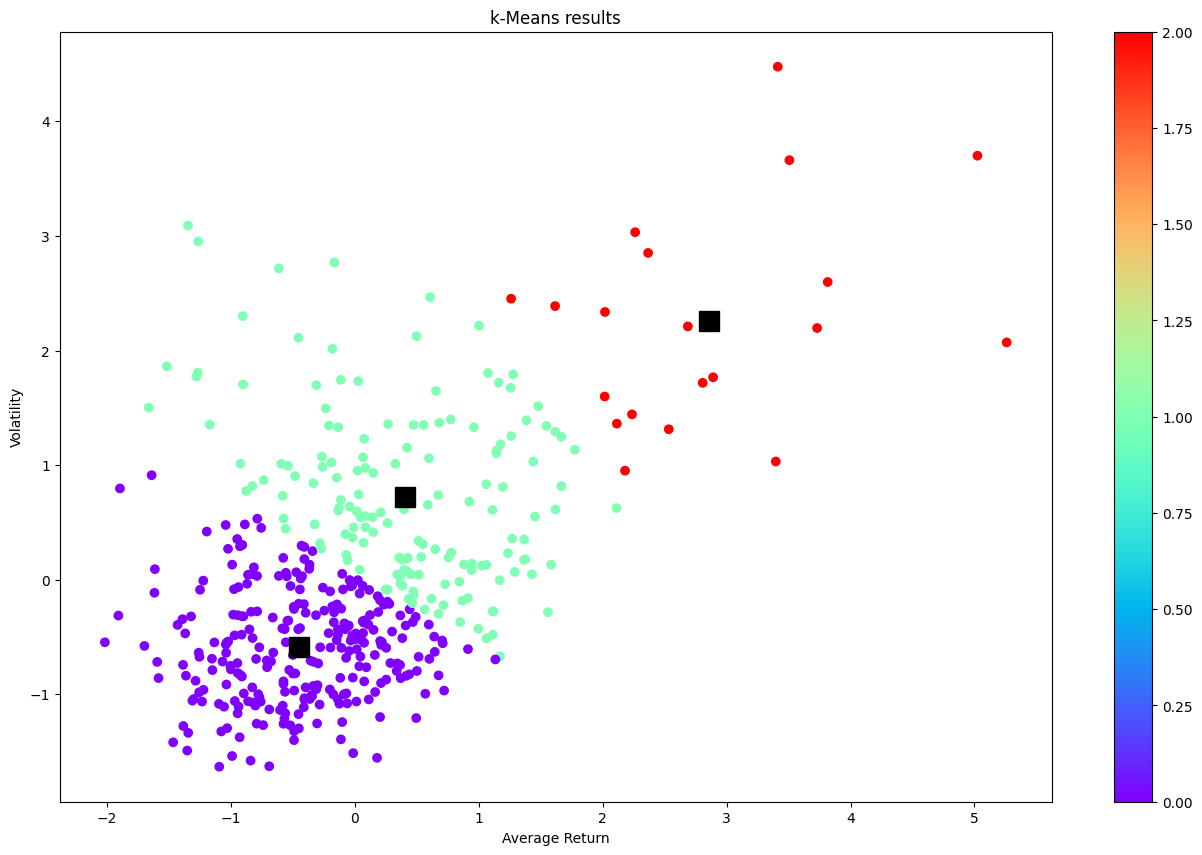

In [79]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter =\
(    
    ax
    .scatter(X.iloc[ : ,0], 
             X.iloc[ : ,1], 
             c = k_means.labels_, 
             cmap = "rainbow", 
             label = X.index)
)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], 
         centroids[:,1], 
         "sg", 
         markersize = 15, 
         color = "black")

In [80]:
# show number of stocks in each cluster

clustered_series =\
(
    pd
    .Series(index = X.index, 
            data = k_means
                   .labels_
                   .flatten()
            )
)

In [81]:
# clustered stock with its cluster label
clustered_series_all =\
(    
    pd
    .Series(index=X.index, 
            data=k_means.labels_.flatten()
            )
)

clustered_series = clustered_series[clustered_series != -1]

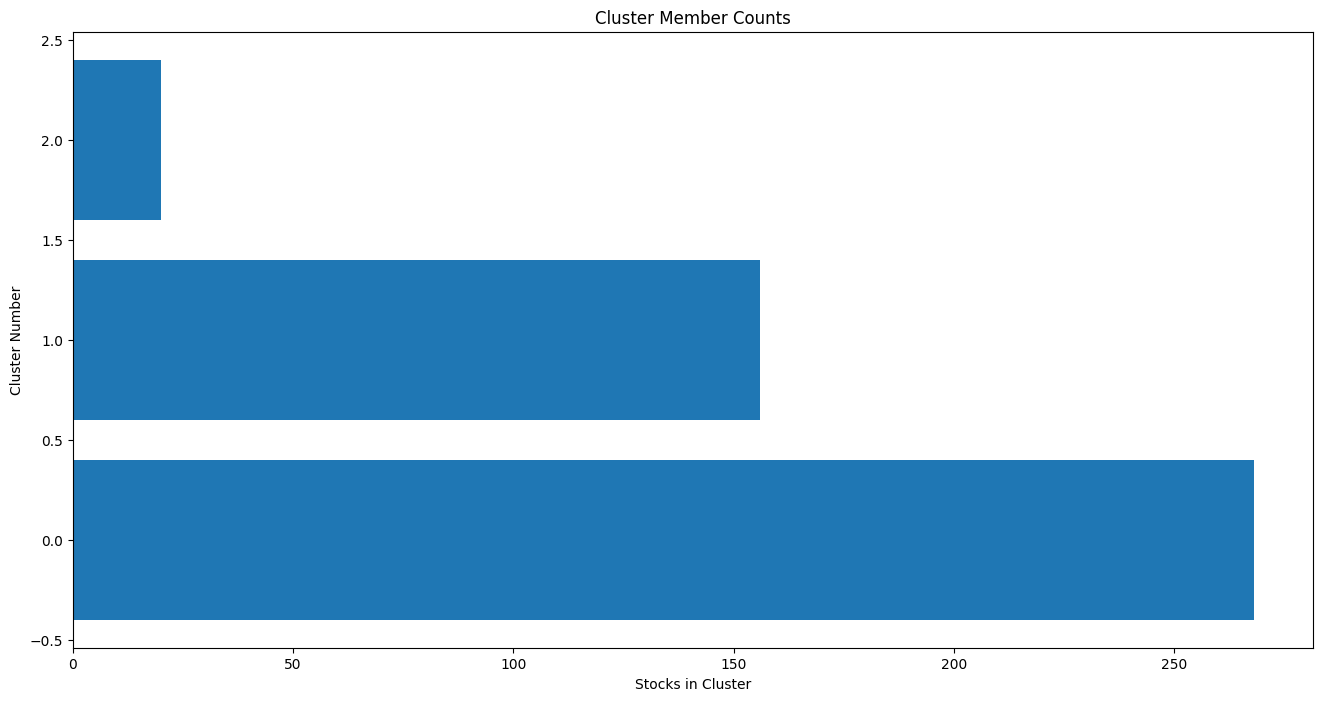

In [82]:
plt.figure(figsize=(16,8)
          )

plt.barh(
    range(len(clustered_series.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series.value_counts()
)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

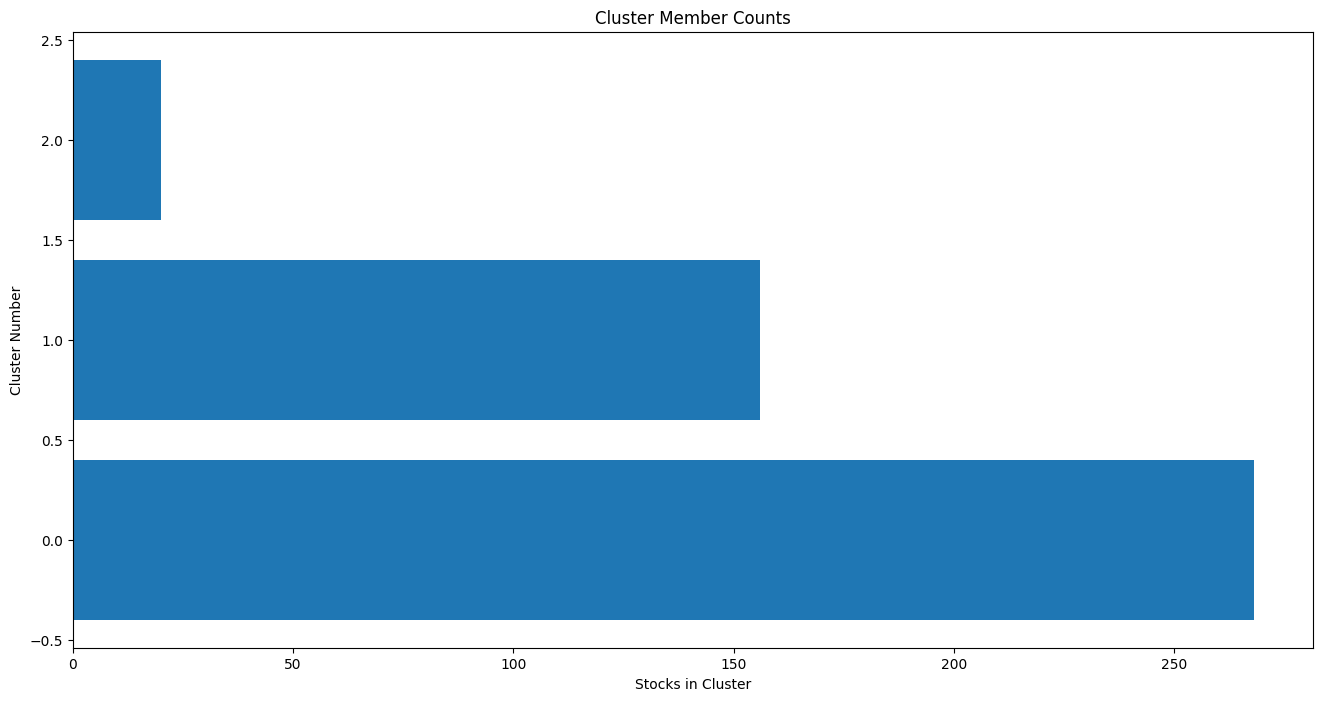

In [83]:
plt.figure(figsize=(16,8)
          )

counts =\
(    
    clustered_series
    .value_counts()
    .sort_index()
)

plt.barh(counts.index, 
         counts)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

## 2) Hierarchical Clustering (Agglomerative Clustering)

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [85]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")
Z[0]

array([1.80000000e+02, 1.81000000e+02, 6.61779802e-03, 2.00000000e+00])

In [86]:
Z.ndim

2

In [87]:
pd.DataFrame(Z)

,0,1,2,3
0,180.0,181.0,0.006618,2.0
1,119.0,376.0,0.007394,2.0
2,102.0,337.0,0.008829,2.0
3,195.0,227.0,0.009209,2.0
4,41.0,349.0,0.010263,2.0
...,...,...,...,...
438,874.0,875.0,7.780153,159.0
439,869.0,877.0,9.261937,38.0
440,881.0,882.0,15.465259,342.0
441,880.0,883.0,16.396248,102.0


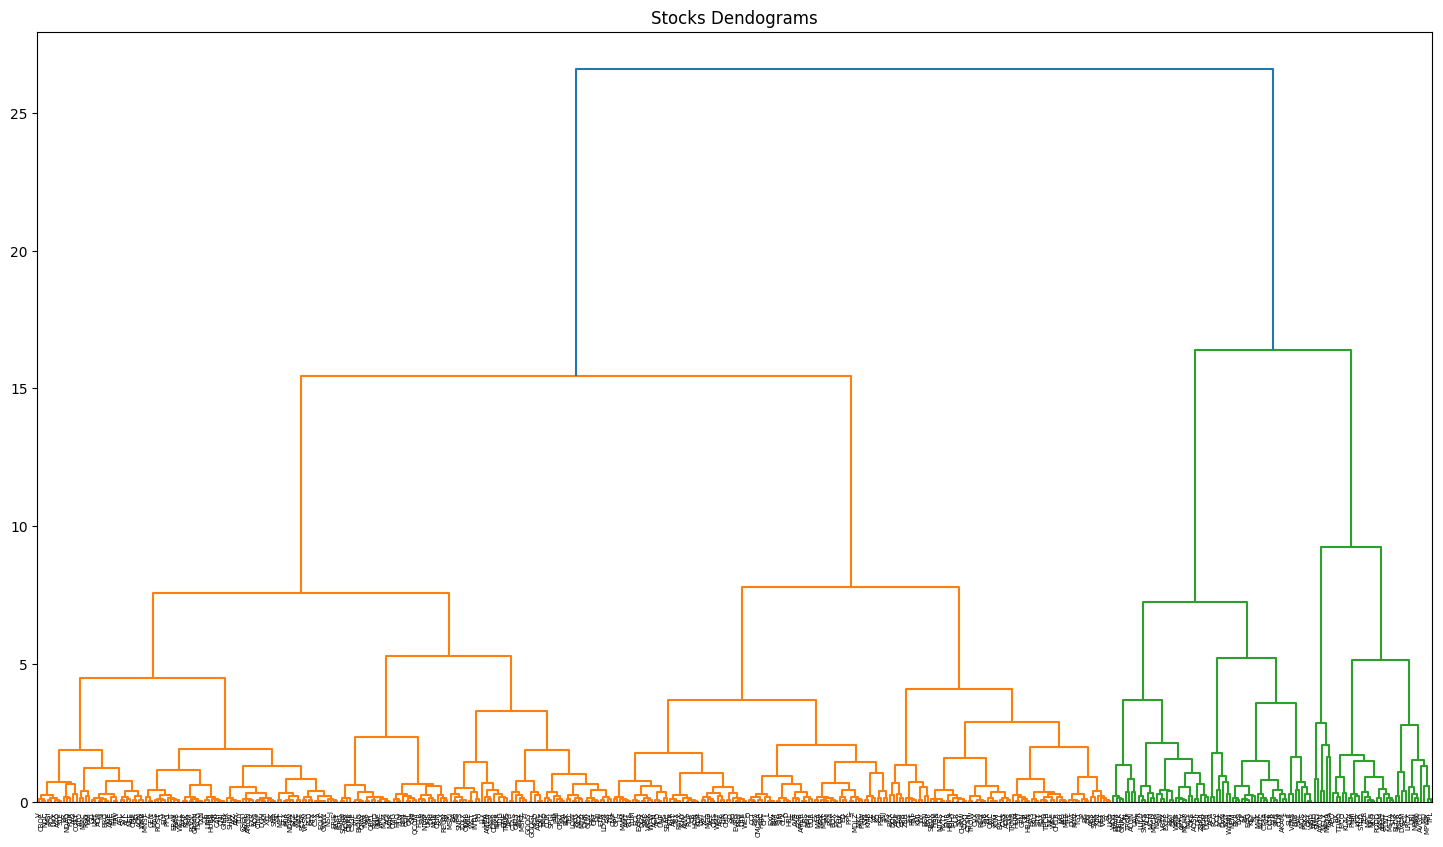

In [88]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

Clustering and Visualization

In [89]:
nclust = 4

hc = AgglomerativeClustering(n_clusters = nclust, 
#                              affinity = "euclidean", 
                             linkage = "ward")

clust_labels1 = hc.fit_predict(X)

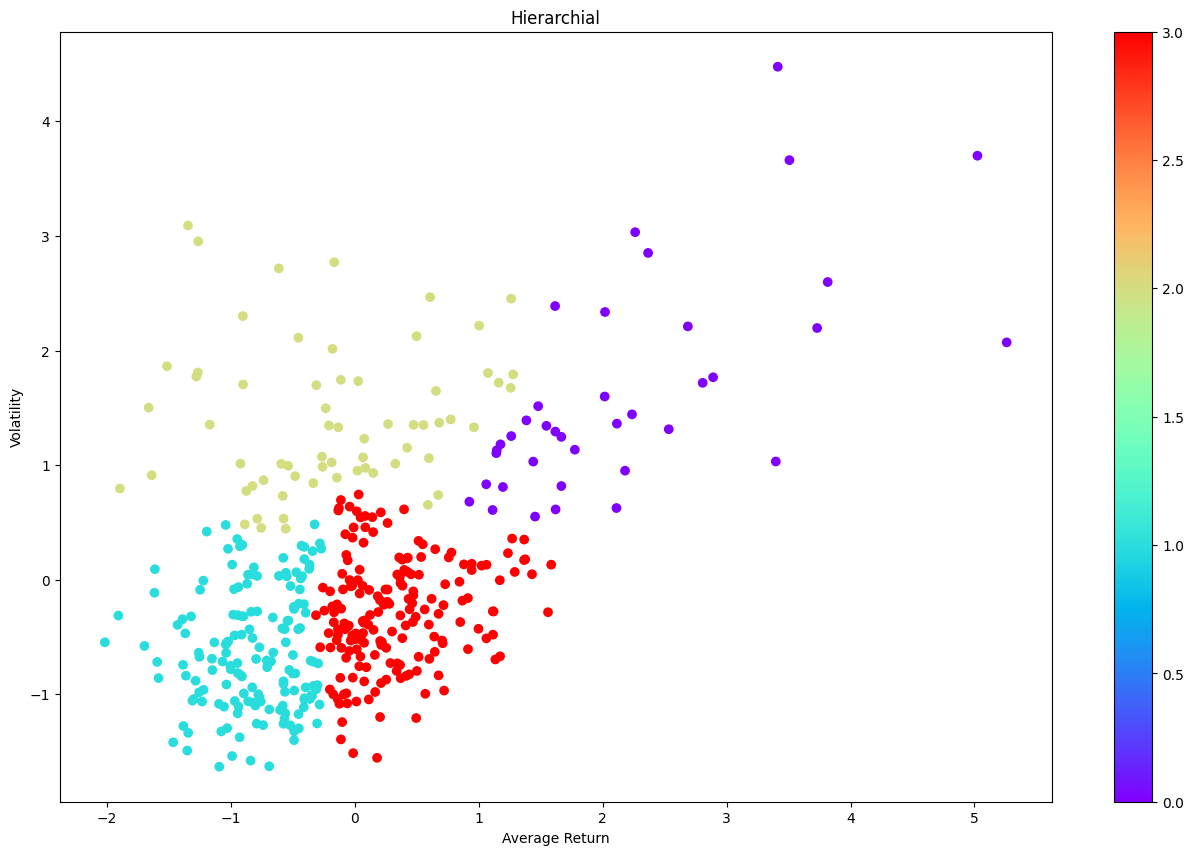

In [90]:
fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], 
                     X.iloc[:,1], 
                     c = clust_labels1, 
                     cmap = "rainbow")

ax.set_title("Hierarchial")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

## 3) Affinity Propagation

In [91]:
ap = AffinityPropagation()

ap.fit(X)

clust_labels2 = ap.predict(X)

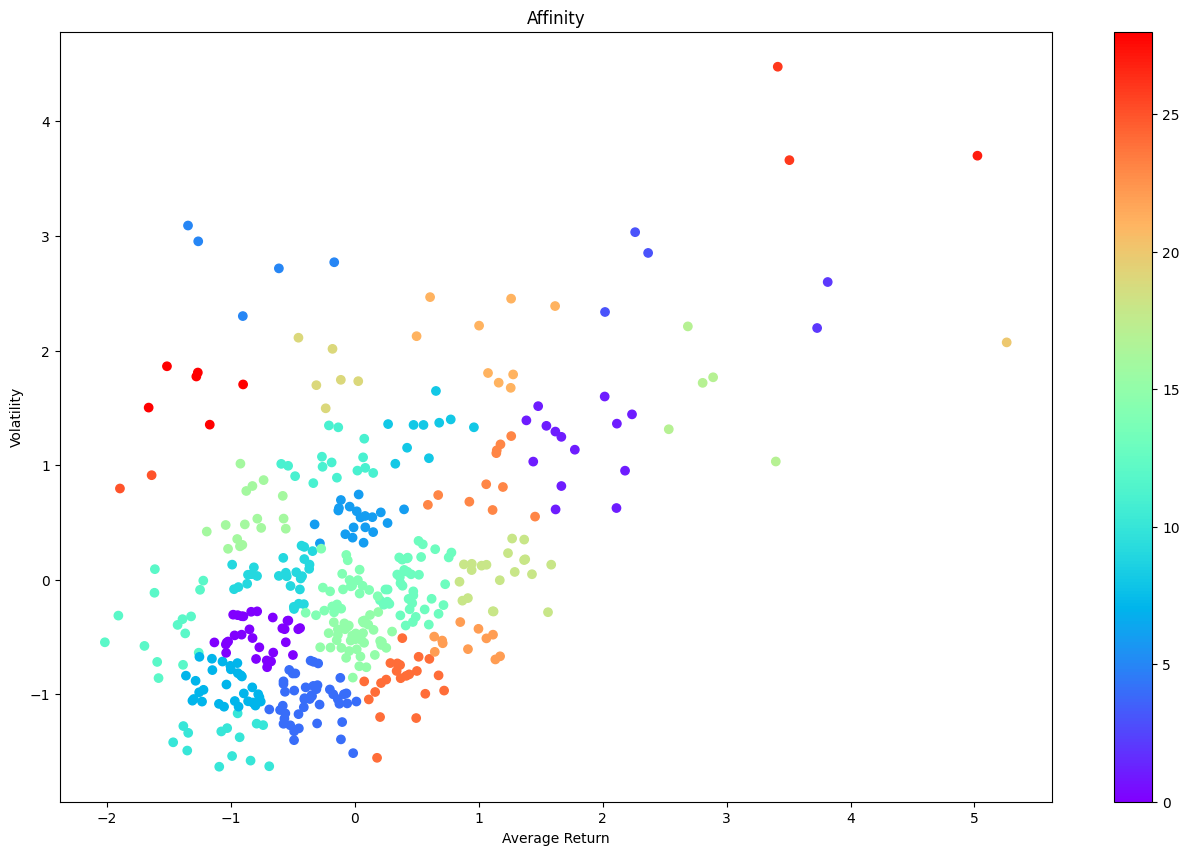

In [92]:
fig = plt.figure(figsize=(16,10)
                )
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], 
                     X.iloc[:,1], 
                     c = clust_labels2, 
                     cmap = "rainbow")

ax.set_title("Affinity")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")
             
plt.colorbar(scatter)

## Cluster Visualisation

In [93]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 29


<Figure size 640x480 with 0 Axes>

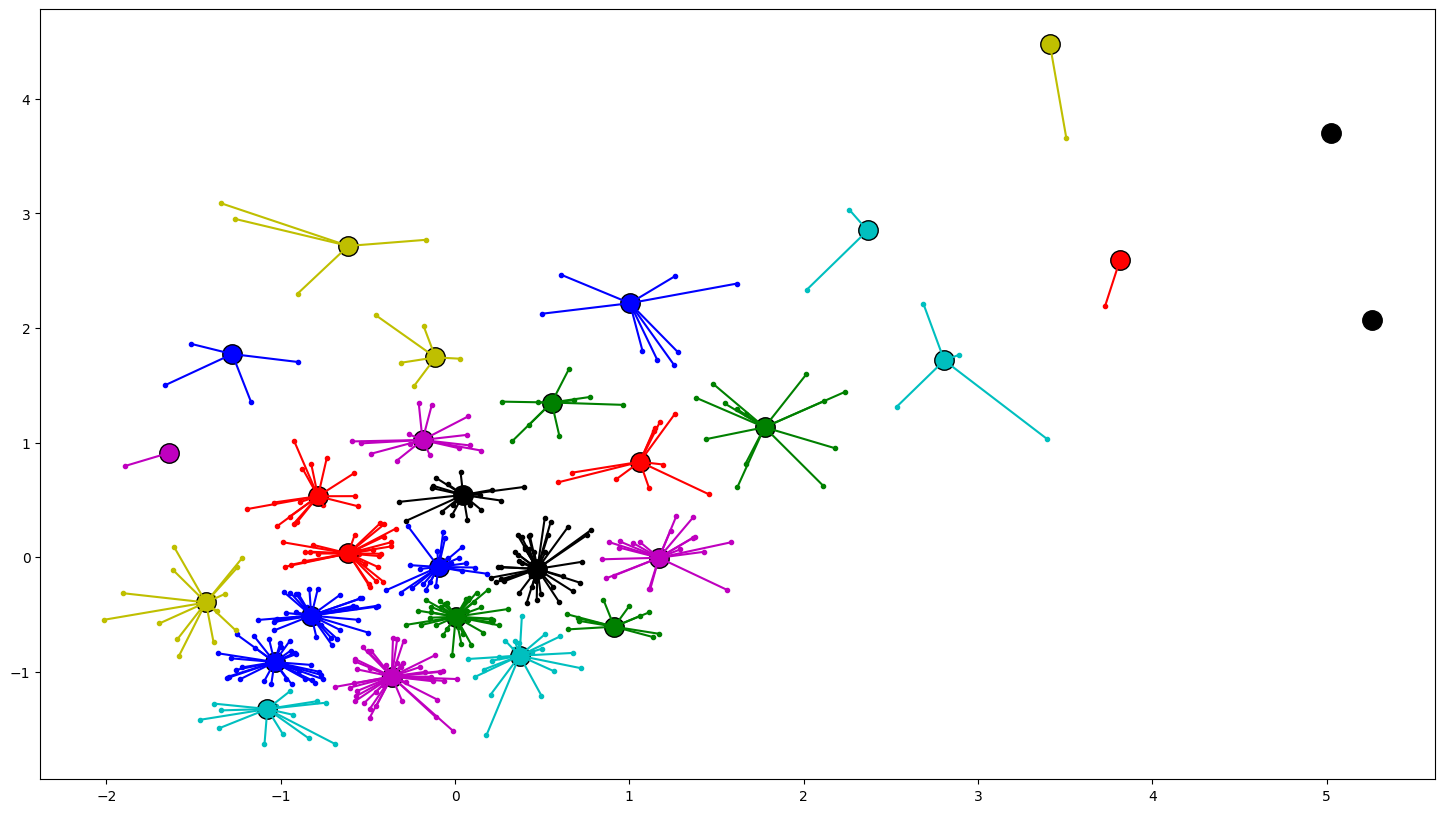

In [94]:
no_clusters = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % no_clusters)

# Plot exemplars

X_temp = np.asarray(X)

plt.close("all")
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(18,10)
                )
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk") # The sequence "bgrcmyk" (blue, green, red, cyan, magenta, yellow, black) 
                                               # is repeated four times

for k, col in zip(range(no_clusters), colors):
    
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + ".")
    
    plt.plot(cluster_center[0], cluster_center[1], 
             "o", 
             markerfacecolor = col, 
             markeredgecolor = "k", 
             markersize = 14)
    
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

## options to proceed from here 
1) centeroid of each cluster
2) choose one stock per cluster
3) Select only largest cluster

In [95]:
cluster_centers_indices

array([  7,  21,  42,  57,  69,  73,  90,  98, 110, 111, 133, 141, 168,
       177, 216, 222, 252, 277, 280, 284, 301, 308, 310, 322, 348, 359,
       360, 397, 424])

In [96]:
len(cluster_centers_indices)

29

In [97]:
### extract out tickets of representative stocks based on cluster centers
representative_tickers =  X.index[cluster_centers_indices].tolist()
print(representative_tickers)


['ADM', 'AMAT', 'AXON', 'BLDR', 'CB', 'CCL', 'COF', 'CPT', 'DAL', 'DD', 'ED', 'EOG', 'FRT', 'GLW', 'IT', 'JCI', 'LYB', 'MPWR', 'MSCI', 'MTCH', 'NVDA', 'ON', 'ORLY', 'PHM', 'ROL', 'SLB', 'SMCI', 'TSLA', 'WBD']


In [98]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten()
                               )

# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

In [99]:
from sklearn import metrics

In [100]:
print("km", metrics.silhouette_score(X, k_means.labels_, 
                                     metric='euclidean')
     )

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), 
                                     metric='euclidean')
     )

print("ap", metrics.silhouette_score(X, ap.labels_, 
                                     metric='euclidean')
     )

km 0.3839585251387772
hc 0.35195598505634373
ap 0.3518724474142515


In [101]:
# All stock with its cluster label (including -1)
clustered_series = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                            )

# Clustered stock with its cluster label

clustered_series_all = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

In [102]:
# Get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# Let's visualize some clusters
cluster_vis_list = list(counts[(counts < 25) & (counts > 1)].index)[::-1]
cluster_vis_list

[25, 2, 26, 3, 17, 5, 28, 19, 21, 8, 22, 23, 1, 10, 12, 11, 16, 6, 18, 24, 14]

In [103]:
CLUSTER_SIZE_LIMIT = 9999

counts = clustered_series.value_counts()

ticker_count_reduced = counts[(counts>1) & (counts <= CLUSTER_SIZE_LIMIT)]

print ("Clusters formed: %d" % len(ticker_count_reduced)
      )
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)
                                 ).sum()
      )

Clusters formed: 27
Pairs to evaluate: 10710


## Perform Data split for PCA

In [104]:
breakdown =\
    int(len(scaled_dfprices) * 0.75)

X_Train = scaled_dfprices[    : breakdown] # First 75% of the data
X_Test  = scaled_dfprices[breakdown:     ] # Remaining 25% of the data

X_Train_Raw = Daily_Linear_Return[    :breakdown]
X_Test_Raw  = Daily_Linear_Return[breakdown:    ]

In [105]:
## version 1 - vanilla model of including everything 443 stocks

In [106]:
train_stocks = X_Train[tickers_no_spy] ##443 stocks
test_stocks = X_Test[tickers_no_spy]

train_spy = X_Train["SPY"]
test_spy = X_Test["SPY"]

In [107]:
print(train_stocks.shape[1])

444


In [108]:
## version 2 - use clustered centers

In [109]:
train_stocks_2 = X_Train[representative_tickers]
test_stocks_2 = X_Test[representative_tickers]

train_spy = X_Train["SPY"]
test_spy = X_Test["SPY"]

In [110]:
train_stock_2 = train_stocks_2.dropna()

In [111]:
print(train_stocks_2.tail(1))

Ticker           ADM      AMAT      AXON      BLDR       CB       CCL  \
Date                                                                    
2022-07-08 -0.903173  0.149551 -0.405227  0.068425 -0.62274 -1.099696   

Ticker           COF       CPT       DAL        DD  ...     MTCH      NVDA  \
Date                                                ...                      
2022-07-08 -0.132731 -0.764944 -0.287267 -0.892856  ... -0.33678 -0.125157   

Ticker            ON      ORLY       PHM       ROL       SLB      SMCI  \
Date                                                                     
2022-07-08  0.924719 -0.419574  0.582443  0.169058 -0.084173  0.005848   

Ticker          TSLA       WBD  
Date                            
2022-07-08  0.638197 -1.355559  

[1 rows x 29 columns]


In [112]:
train_spy.head(4)

Date
2012-06-29         NaN
2012-07-02    0.227077
2012-07-03    0.565091
2012-07-05   -0.483121
Name: SPY, dtype: float64

In [113]:
stock_tickers =\
(
 scaled_dfprices
 .columns
 .values
)

stock_tickers

array(['A', 'AAPL', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM',
       'ALB', 'ALGN', 'ALL', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP',
       'AMT', 'AMZN', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV',
       'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO',
       'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB',
       'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRO', 'BSX',
       'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI',
       'CCL', 'CDNS', 'CF', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL',
       'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF',
       'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL',
       'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX',
       'D', 'DAL', 'DD', 'DE', 'DECK', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
       'DLR', 'DLTR', 'DOC', 'DOV', 'DPZ', 'DRI', 'DTE', 'DU

### PCA portion
- Having found the cluster centroids that drive S&P price, we feed this into PCA
- We run with vanilla (all 443 stocks) as well as with the cluster centroids for comparison

## 1 Vanilla

In [114]:
pca =\
(
    PCA()
    .fit(train_stocks.dropna())

)

In [115]:
def build_ML_portfolio_qf627(df):
    return pd.DataFrame(
        {f"ML Portfolio {i+1}": df.dot(pca.components_[i] / np.sum(np.abs(pca.components_[i]))
                                      )
         for i in range(5)
        },
        index = df.index
    )

In [116]:
ml_portfolio_train = build_ML_portfolio_qf627(X_Train_Raw[tickers_no_spy])

ml_portfolio_test = build_ML_portfolio_qf627(X_Test_Raw[tickers_no_spy])

In [117]:
train_all =\
(
    pd
    .concat(
        [ml_portfolio_train, X_Train_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
train_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2012-07-02,0.003490,0.002811,0.000399,0.002089,-0.001779,0.003012
2012-07-03,0.008435,-0.005387,0.002126,-0.001375,0.006863,0.006593
2012-07-05,-0.002819,0.000124,0.004247,0.002796,-0.002329,-0.004512
2012-07-06,-0.011080,0.005055,-0.006950,-0.000514,-0.004382,-0.009504
2012-07-09,-0.003204,0.002426,-0.000630,-0.000570,-0.000164,-0.001255
...,...,...,...,...,...,...
2022-07-01,0.011912,0.006749,-0.003179,0.001751,-0.002473,0.010577
2022-07-05,-0.004411,-0.006623,0.014611,0.007365,-0.014370,0.001889
2022-07-06,0.000780,0.007718,0.004999,-0.003023,-0.001180,0.003377


In [118]:
test_all =\
(
    pd
    .concat(
        [ml_portfolio_test, X_Test_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
test_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2022-07-11,-0.008418,0.007831,-0.004344,-0.004604,-0.001345,-0.011424
2022-07-12,-0.004678,-0.003092,-0.007325,0.001976,-0.007060,-0.008849
2022-07-13,-0.005442,0.000327,0.001623,0.001019,0.003094,-0.005252
2022-07-14,-0.007976,0.003206,0.006210,0.002507,0.000696,-0.002429
2022-07-15,0.019933,-0.007570,0.001681,0.000977,-0.001868,0.019105
...,...,...,...,...,...,...
2025-11-06,-0.005950,0.000270,-0.007210,-0.004078,0.002797,-0.010729
2025-11-07,0.009433,0.002859,-0.003984,0.000849,-0.001908,0.000985
2025-11-10,0.004024,-0.004714,0.002191,0.000742,0.003977,0.015604


In [119]:
def calculate_metrics_pca(ts_returns, periods_per_year=252, starting_capital=100_000):
    """
    Calculate performance metrics for a time series of returns.
    
    Parameters:
    ts_returns: pandas Series (single portfolio) or DataFrame (multiple portfolios)
    periods_per_year: number of periods per year (default 252 for daily)
    starting_capital: initial investment amount
    
    Returns:
    pandas DataFrame with scalar values in each cell, one row per portfolio
    """
    # Handle both Series and DataFrame inputs
    if isinstance(ts_returns, pd.Series):
        ts_returns = pd.DataFrame(ts_returns)
    
    results = []
    
    for column in ts_returns.columns:
        returns = ts_returns[column].dropna()
        
        if len(returns) == 0:
            # Return default values for empty series
            results.append({
                "CAGR": 0.0,
                "Sharpe": 0.0,
                "Max_Drawdown": 0.0,
                "Final_Account_Value": float(starting_capital)
            })
            continue
        
        # Calculate equity curve
        equity = returns.add(1).cumprod()
        equity_dollars = equity * starting_capital
        
        # Calculate time period in years
        if len(equity) > 1:
            years = (equity.index[-1] - equity.index[0]).days / 365.25
        else:
            years = 1.0
        
        n_periods = len(returns)
        n_years = n_periods / periods_per_year
        
        # Get final equity value as scalar
        final_equity = equity.iloc[-1]
        if hasattr(final_equity, 'item'):
            final_equity_scalar = final_equity.item()
        else:
            final_equity_scalar = float(final_equity)
        
        # Annualized return
        if n_years > 0 and final_equity_scalar > 0:
            annualized_return = np.power(final_equity_scalar, (1 / n_years)) - 1
        else:
            annualized_return = 0.0
        
        # Annualized volatility
        annualized_vol = returns.std() * np.sqrt(periods_per_year)
        
        # Handle zero volatility case
        if isinstance(annualized_vol, (int, float, np.floating)):
            annualized_vol_safe = np.nan if annualized_vol == 0 else annualized_vol
        else:
            annualized_vol_safe = annualized_vol.replace(0, np.nan)
        
        # Sharpe ratio
        if pd.notna(annualized_vol_safe) and annualized_vol_safe != 0:
            annualized_sharpe = annualized_return / annualized_vol_safe
        else:
            annualized_sharpe = 0.0
        
        # CAGR
        if years > 0 and final_equity_scalar > 0:
            cagr = final_equity_scalar ** (1 / years) - 1
        else:
            cagr = 0.0
        
        # Maximum drawdown
        rolling_max = equity.cummax()
        drawdown = (equity - rolling_max) / rolling_max
        max_dd = drawdown.min()
        
        # Convert max_dd to scalar if it's a Series
        if hasattr(max_dd, 'item'):
            max_dd_scalar = max_dd.item()
        else:
            max_dd_scalar = float(max_dd)
        
        # Final account value - ensure it's a scalar
        final_val = equity_dollars.iloc[-1]
        if hasattr(final_val, 'item'):
            final_account_value = final_val.item()
        else:
            final_account_value = float(final_val)
        
        results.append({
            "CAGR": float(cagr),
            "Sharpe": float(annualized_sharpe),
            "Max_Drawdown": float(max_dd_scalar),
            "Final_Account_Value": float(final_account_value)
        })
    
    # Create DataFrame with proper index if multiple portfolios
    if len(ts_returns.columns) > 1:
        return pd.DataFrame(results, index=ts_returns.columns)
    else:
        return pd.DataFrame(results)

In [120]:
metrics_train = calculate_metrics_pca(train_all)

In [121]:
print("Training Set Performance")
(
    metrics_train
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Training Set Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,17.51%,0.97,-39.36%,"$503,438.56"
ML Portfolio 2,-0.50%,-0.06,-30.90%,"$95,087.08"
ML Portfolio 3,6.79%,0.92,-19.68%,"$193,077.07"
ML Portfolio 4,2.08%,0.39,-14.91%,"$122,881.48"
ML Portfolio 5,1.84%,0.29,-20.39%,"$120,031.03"
SPY,13.17%,0.78,-33.72%,"$345,124.26"


In [122]:
metrics_test = calculate_metrics_pca(test_all)

In [123]:
print("Testing Set (Out-of-Data) Performance")
(
    metrics_test
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Testing Set (Out-of-Data) Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,16.42%,1.02,-17.45%,"$166,186.71"
ML Portfolio 2,-6.76%,-0.80,-21.85%,"$79,154.43"
ML Portfolio 3,1.47%,0.24,-7.88%,"$104,990.27"
ML Portfolio 4,2.15%,0.46,-6.32%,"$107,378.82"
ML Portfolio 5,1.42%,0.24,-9.04%,"$104,820.99"
SPY,20.02%,1.19,-18.76%,"$183,961.36"


# 2) AP - 29 Clustered stocks + PCA

In [124]:
pca =\
(
    PCA()
    .fit(train_stocks_2.dropna())
)

In [125]:
#version 2
pca = PCA().fit(scaled_train[representative_tickers])


In [126]:
# === Compute ML portfolio returns correctly ===

def compute_ml_portfolio_returns(pca, raw_returns_df, representative_tickers, n_components=5):
    # Extract PCA components
    components = pca.components_[:n_components]

    # Normalize weights so gross exposure = 1
    norm_components = []
    for w in components:
        w = w / np.sum(np.abs(w))
        norm_components.append(w)

    norm_components = np.array(norm_components)  # shape (n_components, n_features)

    # raw simple returns (not scaled)
    R = raw_returns_df[representative_tickers].values  # (T, n_features)

    # portfolio returns = asset returns × weights
    port = R.dot(norm_components.T)  # (T, n_components)

    return pd.DataFrame(
        port,
        index=raw_returns_df.index,
        columns=[f"ML Portfolio {i+1}" for i in range(norm_components.shape[0])]
    )

# Usage
ml_portfolio_train = compute_ml_portfolio_returns(pca, train_ret, representative_tickers, 5)
ml_portfolio_test  = compute_ml_portfolio_returns(pca, test_ret,  representative_tickers, 5)


In [127]:
ml_portfolio_train = build_ML_portfolio_qf627(scaled_train[representative_tickers])

ml_portfolio_test = build_ML_portfolio_qf627(scaled_test[representative_tickers])

In [128]:
train_all =\
(
    pd
    .concat(
        [ml_portfolio_train, X_Train_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
train_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2012-07-02,0.260473,-0.231657,0.283858,0.344594,0.572062,0.003012
2012-07-03,0.485783,0.074299,-0.344342,-0.454756,-0.082873,0.006593
2012-07-05,-0.157911,0.283565,0.175722,0.198918,0.182932,-0.004512
2012-07-06,-0.549921,-0.207740,0.127867,0.284196,-0.013140,-0.009504
2012-07-09,-0.246971,-0.079914,0.113481,0.064955,-0.081846,-0.001255
...,...,...,...,...,...,...
2022-07-01,0.189509,-0.727682,0.373047,0.659239,0.581954,0.010577
2022-07-05,-0.310108,0.941990,-0.243780,1.061761,0.327416,0.001889
2022-07-06,-0.047594,0.181503,0.570748,-0.316672,0.140432,0.003377


In [129]:
pca_train = train_all['ML Portfolio 1']

In [130]:
test_all =\
(
    pd
    .concat(
        [ml_portfolio_test, X_Test_Raw["SPY"].rename("SPY")],
        axis = 1
    )
    .dropna()
)
test_all

,ML Portfolio 1,ML Portfolio 2,ML Portfolio 3,ML Portfolio 4,ML Portfolio 5,SPY
Date,,,,,,
2022-07-12,-0.069490,-0.280331,-0.334763,0.795220,0.048218,-0.008849
2022-07-13,-0.276282,0.158511,0.013160,-0.105541,0.220944,-0.005252
2022-07-14,-0.561418,0.571897,0.110056,-0.058373,-0.034989,-0.002429
2022-07-15,0.970198,0.064862,-0.084049,0.022368,-0.197589,0.019105
2022-07-18,-0.012380,-0.205204,-0.747042,0.226552,-0.187632,-0.008257
...,...,...,...,...,...,...
2025-11-06,-0.700011,-0.439000,0.077015,-0.171174,0.005082,-0.010729
2025-11-07,0.252507,-0.440370,0.352735,0.165219,-0.041333,0.000985
2025-11-10,0.248834,0.285729,-0.064589,-0.118859,-0.302038,0.015604


In [131]:
pca_test = test_all['ML Portfolio 1']

In [132]:
metrics_train = calculate_metrics_pca(train_all)

In [133]:
print("Training Set Performance")
(
    metrics_train
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Training Set Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,0.00%,0.00,-100.00%,$-0.00
ML Portfolio 2,-100.00%,-0.20,-100.00%,$0.00
ML Portfolio 3,-100.00%,-0.20,-100.00%,$0.00
ML Portfolio 4,-99.86%,-0.26,-100.00%,$0.00
ML Portfolio 5,-99.83%,-0.27,-100.00%,$0.00
SPY,13.17%,0.78,-33.72%,"$345,124.26"


In [134]:
metrics_test = calculate_metrics_pca(test_all)

In [135]:
print("Testing Set (Out-of-Data) Performance")
(
    metrics_test
    .style
    .format({"CAGR": "{:.2%}", "Max_Drawdown": "{:.2%}", "Sharpe": "{:.2f}", "Final_Account_Value": "${:,.2f}"})
)

Testing Set (Out-of-Data) Performance


,CAGR,Sharpe,Max_Drawdown,Final_Account_Value
ML Portfolio 1,-100.00%,-0.10,-101.44%,$0.00
ML Portfolio 2,-100.00%,-0.18,-100.00%,$0.00
ML Portfolio 3,0.00%,0.00,-100.00%,$-0.00
ML Portfolio 4,-99.90%,-0.25,-100.00%,$0.00
ML Portfolio 5,-99.18%,-0.26,-100.00%,$0.01
SPY,20.45%,1.21,-18.76%,"$186,087.13"


In [136]:
print(ml_portfolio_test.head())

            ML Portfolio 1  ML Portfolio 2  ML Portfolio 3  ML Portfolio 4  \
Date                                                                         
2022-07-12       -0.069490       -0.280331       -0.334763        0.795220   
2022-07-13       -0.276282        0.158511        0.013160       -0.105541   
2022-07-14       -0.561418        0.571897        0.110056       -0.058373   
2022-07-15        0.970198        0.064862       -0.084049        0.022368   
2022-07-18       -0.012380       -0.205204       -0.747042        0.226552   

            ML Portfolio 5  
Date                        
2022-07-12        0.048218  
2022-07-13        0.220944  
2022-07-14       -0.034989  
2022-07-15       -0.197589  
2022-07-18       -0.187632  


In [137]:
print(test_ret[representative_tickers].head())

Ticker           ADM      AMAT      AXON      BLDR        CB       CCL  \
Date                                                                     
2022-07-12  0.003029  0.001241 -0.012070  0.042181 -0.008576  0.075383   
2022-07-13 -0.002196  0.003945  0.000865  0.009599 -0.009693 -0.014239   
2022-07-14 -0.013619  0.029075 -0.014151 -0.004120 -0.035361 -0.032222   
2022-07-15  0.004184  0.030544  0.037147  0.015752  0.004746  0.053961   
2022-07-18  0.007639 -0.014078  0.004226 -0.001880 -0.016342  0.051198   

Ticker           COF       CPT       DAL        DD  ...      MTCH      NVDA  \
Date                                                ...                       
2022-07-12 -0.001213 -0.001732  0.061454  0.011842  ... -0.014388 -0.004620   
2022-07-13 -0.014107 -0.001584 -0.044709 -0.012244  ... -0.031363  0.005437   
2022-07-14 -0.019710 -0.013978  0.002357 -0.024972  ... -0.045061  0.013717   
2022-07-15  0.045433  0.012107  0.010749  0.020751  ...  0.019375  0.025371   
2022-07

### Phase 3)  Back testing now with the new feature

In [139]:
pca_train

Date
2012-07-02    0.260473
2012-07-03    0.485783
2012-07-05   -0.157911
2012-07-06   -0.549921
2012-07-09   -0.246971
                ...   
2022-07-01    0.189509
2022-07-05   -0.310108
2022-07-06   -0.047594
2022-07-07    1.124036
2022-07-08   -0.221909
Name: ML Portfolio 1, Length: 2521, dtype: float64

In [140]:
X =\
(
    compute_x_var("SPY")
)
X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.973587,95.973587,95.973587
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.963393,95.969970,95.973029
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.924446,95.955725,95.970802
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.088930,96.012073,95.979342
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.291093,96.088767,95.991496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07,-0.006447,0.001825,0.089874,-0.016393,0.009855,0.013731,0.042320,672.709999,659.847765,604.840321,675.862912,670.955571,619.671297
2025-11-10,-0.000909,0.000532,0.024735,-0.002784,0.014992,0.026408,0.060148,674.063331,660.491048,605.227223,676.876929,671.631986,620.285911
2025-11-11,NaN,NaN,-0.094889,0.011427,0.017294,0.024935,0.062652,675.013808,661.124270,605.602398,677.990214,672.365406,620.909932
2025-11-12,0.003433,0.006111,-0.028155,0.008523,0.023062,0.022089,0.068648,676.020952,661.762573,605.968967,678.970176,673.076025,621.531525


In [141]:
train_df =\
(
    pd
    .concat([spy_weekly, X, pca_train],
            axis = 1)
    .dropna()
)
train_df

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1
2012-07-02,-0.017514,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056034,-0.018575,104.904206,106.371522,100.733485,105.961401,105.417692,103.301851,0.260473
2012-07-03,-0.023936,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279691,106.332332,100.753520,106.454358,105.627690,103.355292,0.485783
2012-07-05,-0.024270,0.007533,0.001804,-0.118925,0.026821,0.040282,0.039299,0.011696,105.595483,106.302843,100.771117,106.768527,105.792502,103.403322,-0.157911
2012-07-06,0.001917,-0.002509,-0.013220,0.001170,0.020128,0.020189,0.029220,-0.005915,105.753665,106.257909,100.780362,106.838641,105.880351,103.440644,-0.549921
2012-07-09,0.000813,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026002,-0.020152,105.902448,106.230449,100.792024,106.871564,105.953859,103.476257,-0.246971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.007812,-0.000962,-0.018503,-0.019656,-0.022923,-0.047318,-0.023165,-0.163794,369.813426,389.679038,415.691575,364.258629,372.496028,401.781378,0.189509
2022-07-05,-0.002963,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282610,388.632059,415.518323,364.405603,372.016735,401.416061,-0.310108
2022-07-06,-0.011600,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120928,387.546040,415.352918,364.750020,371.647906,401.066646,-0.047594
2022-07-07,-0.028897,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163839,386.634262,415.203562,366.029280,371.656812,400.775296,1.124036


In [142]:
test_df =\
(
    pd
    .concat([spy_weekly, X, pca_test],
            axis = 1)
    .dropna()
)
test_df

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1
2022-07-12,0.029597,0.007048,-0.002265,-0.009119,-0.002963,0.040102,-0.057989,-0.147606,363.005855,383.852599,414.704753,366.500989,370.885232,399.793123,-0.069490
2022-07-13,0.041216,0.012308,0.001007,0.003361,-0.011600,0.009975,-0.087507,-0.140341,362.582887,382.954508,414.512636,365.696333,370.316854,399.417822,-0.276282
2022-07-14,0.053779,0.021461,-0.014021,0.012195,-0.028897,0.009358,-0.084312,-0.143184,362.788740,382.067083,414.314600,364.878099,369.728415,399.037506,-0.561418
2022-07-15,0.025533,0.017545,-0.014984,-0.016780,-0.009150,0.018528,-0.057265,-0.140273,363.374404,381.213362,414.149519,365.463306,369.623145,398.729638,0.970198
2022-07-18,0.035038,0.006823,0.006863,-0.033809,-0.005952,-0.021062,-0.084421,-0.147822,363.573797,380.394781,413.985129,365.389506,369.328581,398.394591,-0.012380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,-0.014103,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774,-0.053635
2025-10-31,-0.016393,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527,0.028826
2025-11-03,-0.002784,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492,-0.063585
2025-11-04,0.011427,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049274,-0.597509


## calculate orthogonal portfolio

In [145]:
#calculate orthogonal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_df[['SPY_DT', 'SPY_3DT']], train_df['ML Portfolio 1'])
residuals = train_df['ML Portfolio 1'] - lr.predict(train_df[['SPY_DT', 'SPY_3DT']])
train_df['ML_Portfolio_Orthogonal'] = residuals

In [146]:
train_df

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1,ML_Portfolio_Orthogonal
2012-07-02,-0.017514,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056034,-0.018575,104.904206,106.371522,100.733485,105.961401,105.417692,103.301851,0.260473,-0.144773
2012-07-03,-0.023936,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279691,106.332332,100.753520,106.454358,105.627690,103.355292,0.485783,0.065752
2012-07-05,-0.024270,0.007533,0.001804,-0.118925,0.026821,0.040282,0.039299,0.011696,105.595483,106.302843,100.771117,106.768527,105.792502,103.403322,-0.157911,-0.433150
2012-07-06,0.001917,-0.002509,-0.013220,0.001170,0.020128,0.020189,0.029220,-0.005915,105.753665,106.257909,100.780362,106.838641,105.880351,103.440644,-0.549921,-0.744624
2012-07-09,0.000813,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026002,-0.020152,105.902448,106.230449,100.792024,106.871564,105.953859,103.476257,-0.246971,-0.157840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.007812,-0.000962,-0.018503,-0.019656,-0.022923,-0.047318,-0.023165,-0.163794,369.813426,389.679038,415.691575,364.258629,372.496028,401.781378,0.189509,0.487205
2022-07-05,-0.002963,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282610,388.632059,415.518323,364.405603,372.016735,401.416061,-0.310108,-0.087068
2022-07-06,-0.011600,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120928,387.546040,415.352918,364.750020,371.647906,401.066646,-0.047594,-0.101077
2022-07-07,-0.028897,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163839,386.634262,415.203562,366.029280,371.656812,400.775296,1.124036,0.893995


In [148]:
##do on test now
residuals_test = test_df['ML Portfolio 1'] - lr.predict(test_df[['SPY_DT', 'SPY_3DT']])
test_df['ML_Portfolio_Orthogonal'] = residuals_test

In [149]:
test_df

,SPY_pred,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML Portfolio 1,ML_Portfolio_Orthogonal
2022-07-12,0.029597,0.007048,-0.002265,-0.009119,-0.002963,0.040102,-0.057989,-0.147606,363.005855,383.852599,414.704753,366.500989,370.885232,399.793123,-0.069490,-0.023442
2022-07-13,0.041216,0.012308,0.001007,0.003361,-0.011600,0.009975,-0.087507,-0.140341,362.582887,382.954508,414.512636,365.696333,370.316854,399.417822,-0.276282,-0.124545
2022-07-14,0.053779,0.021461,-0.014021,0.012195,-0.028897,0.009358,-0.084312,-0.143184,362.788740,382.067083,414.314600,364.878099,369.728415,399.037506,-0.561418,-0.222872
2022-07-15,0.025533,0.017545,-0.014984,-0.016780,-0.009150,0.018528,-0.057265,-0.140273,363.374404,381.213362,414.149519,365.463306,369.623145,398.729638,0.970198,1.091950
2022-07-18,0.035038,0.006823,0.006863,-0.033809,-0.005952,-0.021062,-0.084421,-0.147822,363.573797,380.394781,413.985129,365.389506,369.328581,398.394591,-0.012380,0.091358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,-0.014103,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774,-0.053635,-0.156983
2025-10-31,-0.016393,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527,0.028826,-0.034825
2025-11-03,-0.002784,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492,-0.063585,-0.015408
2025-11-04,0.011427,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049274,-0.597509,-0.387667


In [150]:
Y_train =\
(
    train_df
    .loc[:, 'SPY_pred']
)
Y_train

2012-07-02   -0.017514
2012-07-03   -0.023936
2012-07-05   -0.024270
2012-07-06    0.001917
2012-07-09    0.000813
                ...   
2022-07-01    0.007812
2022-07-05   -0.002963
2022-07-06   -0.011600
2022-07-07   -0.028897
2022-07-08   -0.009150
Name: SPY_pred, Length: 2381, dtype: float64

In [151]:
Y_test =\
(
    test_df
    .loc[:, 'SPY_pred']
)
Y_test

2022-07-12    0.029597
2022-07-13    0.041216
2022-07-14    0.053779
2022-07-15    0.025533
2022-07-18    0.035038
                ...   
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
Name: SPY_pred, Length: 793, dtype: float64

In [ ]:
X_train =\
(
    # train_df.iloc[ : , 1:].loc[ : , ~train_df.columns.str.contains(r"ML Portfolio 1")]
    train_df.iloc[:, 1:].drop(columns=[col for col in train_df.columns[1:] if "ML Portfolio 1" in col])
)
X_train

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML_Portfolio_Orthogonal
2012-07-02,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056034,-0.018575,104.904206,106.371522,100.733485,105.961401,105.417692,103.301851,-0.144773
2012-07-03,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279691,106.332332,100.753520,106.454358,105.627690,103.355292,0.065752
2012-07-05,0.007533,0.001804,-0.118925,0.026821,0.040282,0.039299,0.011696,105.595483,106.302843,100.771117,106.768527,105.792502,103.403322,-0.433150
2012-07-06,-0.002509,-0.013220,0.001170,0.020128,0.020189,0.029220,-0.005915,105.753665,106.257909,100.780362,106.838641,105.880351,103.440644,-0.744624
2012-07-09,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026002,-0.020152,105.902448,106.230449,100.792024,106.871564,105.953859,103.476257,-0.157840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.000962,-0.018503,-0.019656,-0.022923,-0.047318,-0.023165,-0.163794,369.813426,389.679038,415.691575,364.258629,372.496028,401.781378,0.487205
2022-07-05,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282610,388.632059,415.518323,364.405603,372.016735,401.416061,-0.087068
2022-07-06,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120928,387.546040,415.352918,364.750020,371.647906,401.066646,-0.101077
2022-07-07,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163839,386.634262,415.203562,366.029280,371.656812,400.775296,0.893995


In [163]:
X_test =\
(

    test_df.iloc[:, 1:].drop(columns=[col for col in test_df.columns[1:] if "ML Portfolio 1" in col])

)
X_test

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML_Portfolio_Orthogonal
2022-07-12,0.007048,-0.002265,-0.009119,-0.002963,0.040102,-0.057989,-0.147606,363.005855,383.852599,414.704753,366.500989,370.885232,399.793123,-0.023442
2022-07-13,0.012308,0.001007,0.003361,-0.011600,0.009975,-0.087507,-0.140341,362.582887,382.954508,414.512636,365.696333,370.316854,399.417822,-0.124545
2022-07-14,0.021461,-0.014021,0.012195,-0.028897,0.009358,-0.084312,-0.143184,362.788740,382.067083,414.314600,364.878099,369.728415,399.037506,-0.222872
2022-07-15,0.017545,-0.014984,-0.016780,-0.009150,0.018528,-0.057265,-0.140273,363.374404,381.213362,414.149519,365.463306,369.623145,398.729638,1.091950
2022-07-18,0.006823,0.006863,-0.033809,-0.005952,-0.021062,-0.084421,-0.147822,363.573797,380.394781,413.985129,365.389506,369.328581,398.394591,0.091358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249268,677.684290,668.437805,616.156774,-0.156983
2025-10-31,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674974,678.479873,669.316656,616.812527,-0.034825
2025-11-03,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492,-0.015408
2025-11-04,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049274,-0.387667


In [ ]:
# Y =\
# (
#     masterdata
#     .loc[ : , spy_weekly.name]
# )

# Y

2007-11-01   -0.025958
2007-11-02   -0.040905
2007-11-05   -0.043241
2007-11-06   -0.026589
2007-11-07   -0.001624
                ...   
2025-10-30   -0.014103
2025-10-31   -0.016393
2025-11-03   -0.002784
2025-11-04    0.011427
2025-11-05    0.008523
Name: SPY_pred, Length: 4292, dtype: float64

In [ ]:
# X =\
# (
#     masterdata
#     .iloc[ : , 1:]
# )
# X

,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200
2007-11-01,0.006813,0.016125,0.091998,-0.005349,-0.028974,-0.003509,0.012710,109.807360,106.911717,103.875342,109.197502,108.933154,105.208136
2007-11-02,0.006383,0.014806,0.162442,-0.015879,-0.033365,-0.005080,0.043917,109.711429,106.976129,103.923124,108.982432,108.873893,105.236061
2007-11-05,-0.001309,0.009177,0.201677,-0.026828,-0.032521,-0.010870,0.040970,109.514124,107.009894,103.967868,108.657098,108.765454,105.255534
2007-11-06,-0.001832,0.009054,0.015073,-0.006489,-0.011181,0.004482,0.050755,109.413772,107.043317,104.019007,108.653288,108.757112,105.289172
2007-11-07,-0.017326,0.012816,0.357376,-0.044561,-0.041971,-0.028526,0.038422,109.122237,107.079676,104.054067,108.109830,108.557574,105.292904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,0.009450,-0.013298,-0.022801,0.011942,0.012835,0.028953,0.074489,670.992376,655.518738,602.249269,677.684290,668.437805,616.156774
2025-10-31,0.008016,-0.011877,0.063316,0.007077,0.043510,0.027287,0.078601,671.603806,656.354215,602.674975,678.479873,669.316656,616.812527
2025-11-03,0.006770,-0.013670,0.083787,-0.002777,0.030157,0.024442,0.072709,672.276664,657.260664,603.112660,679.363537,670.221390,617.474492
2025-11-04,0.009225,-0.017931,0.145939,-0.017353,0.019455,0.017976,0.062764,672.449521,657.962401,603.562780,678.613801,670.545171,618.049273


In [ ]:
# ##try a different subset
# X =\
# (
#     X
#     .loc[ : , ~X.columns.str.contains(r"ML Portfolio 1")]
# )
# X


,DEXJPUS,DEXUSUK,VIXCLS,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT,SPY_MA_21,SPY_MA_63,SPY_MA_252,SPY_EMA_10,SPY_EMA_30,SPY_EMA_200,ML_Portfolio_Orthogonal
2012-07-02,-0.001007,0.007940,-0.193175,0.038761,0.043244,0.056034,-0.018575,104.904199,106.371518,100.733486,105.961392,105.417686,103.301851,-0.003303
2012-07-03,0.003894,0.005236,-0.168623,0.040319,0.038390,0.045563,-0.000709,105.279682,106.332328,100.753521,106.454350,105.627684,103.355292,0.002131
2012-07-05,0.007533,0.001804,-0.118925,0.026820,0.040283,0.039299,0.011696,105.595475,106.302840,100.771118,106.768519,105.792497,103.403321,-0.009395
2012-07-06,-0.002509,-0.013220,0.001170,0.020129,0.020189,0.029221,-0.005915,105.753656,106.257906,100.780363,106.838636,105.880346,103.440643,-0.016135
2012-07-09,0.003017,-0.011031,0.067881,-0.005748,0.008759,0.026001,-0.020151,105.902441,106.230446,100.792025,106.871565,105.953856,103.476256,-0.003753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.000962,-0.018503,-0.019656,-0.022923,-0.047319,-0.023165,-0.163795,369.813430,389.679046,415.691576,364.258628,372.496030,401.781380,0.010170
2022-07-05,-0.003457,-0.022212,-0.029340,-0.017209,-0.016007,-0.015135,-0.151858,368.282609,388.632066,415.518324,364.405596,372.016735,401.416062,0.004790
2022-07-06,-0.006173,-0.020285,-0.052116,0.006807,0.026072,-0.012200,-0.153513,367.120924,387.546046,415.352918,364.750003,371.647903,401.066647,-0.003960
2022-07-07,0.002208,-0.013910,-0.096077,0.022488,0.043956,-0.015871,-0.135969,366.163840,386.634267,415.203562,366.029277,371.656813,400.775298,0.021671


In [ ]:
# testing_set = 0.25

# train_size = int(len(X) * (1 - testing_set)
#                 )
# train_size_bh = int(len(bh_returns) * (1 - testing_set))

In [ ]:
# Y_train, Y_test =\
# (
#     Y[0         : train_size],
#     Y[train_size:len(Y)     ]
# )

In [ ]:
# X_train, X_test =\
# (
#     X[0         : train_size],
#     X[train_size:len(X)     ]
# )

In [166]:
#set up variables for buyandhold
spy_weekly_price = spy_price.resample('W-FRI').last() 
bh_returns = np.log(spy_weekly_price).diff()   # no shift!
bh_train = bh_returns.iloc[:train_size_bh].dropna()
bh_test  = bh_returns.iloc[train_size_bh:].dropna()

In [167]:
linear_regression = None

for name, model in models:
    if name == "LR":
        linear_regression = model
        break
linear_regression.fit(X_train, Y_train)

y_pred_train_lr = linear_regression.predict(X_train)
y_pred_test_lr = linear_regression.predict(X_test)


In [168]:
# Apply simple momentum
train_momentum = simple_momentum_strategy(y_pred_train_lr, Y_train)
test_momentum = simple_momentum_strategy(y_pred_test_lr, Y_test)
linear_regression_results = compute_and_compare(train_momentum, test_momentum, bh_train, bh_test)


Momentum Strategy Performance:
Training Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  17.82    0.36          -0.4             516407.6

Testing Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  8.14     0.2         -0.56             129634.7

Buy-and-Hold Performance:
Training Set:
   CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  9.72    0.59         -0.55            379102.47

Testing Set:
    CAGR  Sharpe  Max_Drawdown  Final_Account_Value
0  13.93     0.9         -0.24            188265.43

PERFORMANCE COMPARISON: Momentum vs Buy-and-Hold

SHARPE RATIO:
Train - Momentum: 0.360 vs BH: 0.590
Test  - Momentum: 0.200 vs BH: 0.900

CAGR (Annualized Return):
Train - Momentum: 17.820 vs BH: 9.720
Test  - Momentum: 8.140 vs BH: 13.930

MAX DRAWDOWN:
Train - Momentum: -0.400 vs BH: -0.550
Test  - Momentum: -0.560 vs BH: -0.240

FINAL ACCOUNT VALUE ($):
Train - Momentum: $516,407.60 vs BH: $379,102.47
Test  - Momentum: $129,634.70 vs BH: $188,265.43

OUTPERFORMANCE